# MLP Evaluation - Semeion Dataset

## 1. Preparation
Perform neccesary imports and load preprocessed data

In [6]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

# Load ground truth
SYtrain = np.load('semeionTrainGT_preprocessed.npy')
SYtest = np.load('semeionTestGT_preprocessed.npy')

# Load data
SXtrain = np.load('semeionTrainpics_preprocessed.npy')
SXtest = np.load('semeionTestpics_preprocessed.npy')

## 2. Training
### 2.1. Hyperparameter Tuning, Cross Validation

To improve the performance of the model, we used GridSearchCV from scikit-learn for hyperparameter tuning. This tool runs through different possible combinations of previously defined parameters and determines the best combination of parameters with respect to the chosen scoring metric, which in our case is the accuracy of the model. It is also possible to define the number of cv folds for each combination of parameters. We have chosen 3 folds for this step.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define which hyperparameters should be used
param_grid = {
    'random_state': [1,3,5], #Use different seeds
    'hidden_layer_sizes': [ (10,),(8, 6), (10, 8),(20, 10),(100, 50, 20)],
    'activation': ['identity','relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=MLPClassifier(verbose=True,max_iter=300),
                           scoring='accuracy', # optimize the accuracy with the selection of the hyperparameters
                           param_grid=param_grid,
                           cv=3)  # cv is the amount of folds for cross validation
# Perform Grid Search to identify the best hyper parameters
grid_search.fit(SXtrain, SYtrain)

print("Best Hyperparameters to optimize accuracy:", grid_search.best_params_)

Iteration 1, loss = 2.52253686
Iteration 2, loss = 2.49349612
Iteration 3, loss = 2.45250967
Iteration 4, loss = 2.40777121
Iteration 5, loss = 2.36284239
Iteration 6, loss = 2.31960303
Iteration 7, loss = 2.27883402
Iteration 8, loss = 2.23815129
Iteration 9, loss = 2.19945682
Iteration 10, loss = 2.16115965
Iteration 11, loss = 2.12463365
Iteration 12, loss = 2.08875428
Iteration 13, loss = 2.05374462
Iteration 14, loss = 2.02013625
Iteration 15, loss = 1.98757605
Iteration 16, loss = 1.95591543
Iteration 17, loss = 1.92544265
Iteration 18, loss = 1.89553685
Iteration 19, loss = 1.86643980
Iteration 20, loss = 1.83806443
Iteration 21, loss = 1.81094089
Iteration 22, loss = 1.78402878
Iteration 23, loss = 1.75808245
Iteration 24, loss = 1.73251245
Iteration 25, loss = 1.70751285
Iteration 26, loss = 1.68317927
Iteration 27, loss = 1.65950231
Iteration 28, loss = 1.63620955
Iteration 29, loss = 1.61326712
Iteration 30, loss = 1.59098491
Iteration 31, loss = 1.56913176
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 2.30905298
Iteration 7, loss = 2.26388736
Iteration 8, loss = 2.21923585
Iteration 9, loss = 2.17711889
Iteration 10, loss = 2.13549823
Iteration 11, loss = 2.09591032
Iteration 12, loss = 2.05755020
Iteration 13, loss = 2.02009829
Iteration 14, loss = 1.98420463
Iteration 15, loss = 1.94961919
Iteration 16, loss = 1.91591109
Iteration 17, loss = 1.88306365
Iteration 18, loss = 1.85139496
Iteration 19, loss = 1.82032343
Iteration 20, loss = 1.79016608
Iteration 21, loss = 1.76106311
Iteration 22, loss = 1.73271693
Iteration 23, loss = 1.70494554
Iteration 24, loss = 1.67808949
Iteration 25, loss = 1.65178617
Iteration 26, loss = 1.62642179
Iteration 27, loss = 1.60153753
Iteration 28, loss = 1.57732483
Iteration 29, loss = 1.55360583
Iteration 30, loss = 1.53063031
Iteration 31, loss = 1.50817299
Iteration 32, loss = 1.48586590
Iteration 33, loss = 1.46429566
Iteration 34, loss = 1.44351297
Iteration 35, loss = 1.42296511
Iteration 36, loss = 1.40310991
Iteration 37

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 2.11524650
Iteration 12, loss = 2.07920737
Iteration 13, loss = 2.04382929
Iteration 14, loss = 2.00944985
Iteration 15, loss = 1.97653150
Iteration 16, loss = 1.94431127
Iteration 17, loss = 1.91359977
Iteration 18, loss = 1.88307249
Iteration 19, loss = 1.85381439
Iteration 20, loss = 1.82507737
Iteration 21, loss = 1.79722570
Iteration 22, loss = 1.77000203
Iteration 23, loss = 1.74353939
Iteration 24, loss = 1.71756997
Iteration 25, loss = 1.69242161
Iteration 26, loss = 1.66755436
Iteration 27, loss = 1.64321766
Iteration 28, loss = 1.61993311
Iteration 29, loss = 1.59665887
Iteration 30, loss = 1.57372414
Iteration 31, loss = 1.55151576
Iteration 32, loss = 1.52985063
Iteration 33, loss = 1.50845174
Iteration 34, loss = 1.48760866
Iteration 35, loss = 1.46722390
Iteration 36, loss = 1.44750566
Iteration 37, loss = 1.42780698
Iteration 38, loss = 1.40852244
Iteration 39, loss = 1.38980231
Iteration 40, loss = 1.37157934
Iteration 41, loss = 1.35317480
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 2.15321099
Iteration 4, loss = 2.02494623
Iteration 5, loss = 1.90810540
Iteration 6, loss = 1.79853538
Iteration 7, loss = 1.70146778
Iteration 8, loss = 1.61004557
Iteration 9, loss = 1.52622895
Iteration 10, loss = 1.44736926
Iteration 11, loss = 1.37622339
Iteration 12, loss = 1.30870491
Iteration 13, loss = 1.24469900
Iteration 14, loss = 1.18597492
Iteration 15, loss = 1.13132651
Iteration 16, loss = 1.07921803
Iteration 17, loss = 1.03141384
Iteration 18, loss = 0.98572783
Iteration 19, loss = 0.94308794
Iteration 20, loss = 0.90259272
Iteration 21, loss = 0.86616333
Iteration 22, loss = 0.83029241
Iteration 23, loss = 0.79656148
Iteration 24, loss = 0.76533642
Iteration 25, loss = 0.73686862
Iteration 26, loss = 0.70916375
Iteration 27, loss = 0.68170222
Iteration 28, loss = 0.65597790
Iteration 29, loss = 0.63164767
Iteration 30, loss = 0.60949781
Iteration 31, loss = 0.58814670
Iteration 32, loss = 0.56802022
Iteration 33, loss = 0.54903087
Iteration 34, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.25836559
Iteration 13, loss = 1.19432676
Iteration 14, loss = 1.13565200
Iteration 15, loss = 1.08157820
Iteration 16, loss = 1.03075488
Iteration 17, loss = 0.98344366
Iteration 18, loss = 0.93965935
Iteration 19, loss = 0.89811357
Iteration 20, loss = 0.85942346
Iteration 21, loss = 0.82405564
Iteration 22, loss = 0.79010053
Iteration 23, loss = 0.75797381
Iteration 24, loss = 0.72866505
Iteration 25, loss = 0.70142225
Iteration 26, loss = 0.67528972
Iteration 27, loss = 0.65044424
Iteration 28, loss = 0.62618632
Iteration 29, loss = 0.60336613
Iteration 30, loss = 0.58234651
Iteration 31, loss = 0.56268510
Iteration 32, loss = 0.54346592
Iteration 33, loss = 0.52553341
Iteration 34, loss = 0.50873176
Iteration 35, loss = 0.49235962
Iteration 36, loss = 0.47774785
Iteration 37, loss = 0.46250416
Iteration 38, loss = 0.44814270
Iteration 39, loss = 0.43442384
Iteration 40, loss = 0.42175716
Iteration 41, loss = 0.40951228
Iteration 42, loss = 0.39785346
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.57109665
Iteration 2, loss = 2.50737215
Iteration 3, loss = 2.43803864
Iteration 4, loss = 2.37925113
Iteration 5, loss = 2.33038064
Iteration 6, loss = 2.28319149
Iteration 7, loss = 2.23907941
Iteration 8, loss = 2.19770476
Iteration 9, loss = 2.15754113
Iteration 10, loss = 2.11930590
Iteration 11, loss = 2.08284313
Iteration 12, loss = 2.04797001
Iteration 13, loss = 2.01394361
Iteration 14, loss = 1.98183184
Iteration 15, loss = 1.95046563
Iteration 16, loss = 1.91996774
Iteration 17, loss = 1.89098844
Iteration 18, loss = 1.86268375
Iteration 19, loss = 1.83567680
Iteration 20, loss = 1.80908773
Iteration 21, loss = 1.78346744
Iteration 22, loss = 1.75837436
Iteration 23, loss = 1.73388440
Iteration 24, loss = 1.70953251
Iteration 25, loss = 1.68649913
Iteration 26, loss = 1.66364945
Iteration 27, loss = 1.64145988
Iteration 28, loss = 1.61976974
Iteration 29, loss = 1.59888164
Iteration 30, loss = 1.57798074
Iteration 31, loss = 1.55801643
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 2.17166629
Iteration 9, loss = 2.12898919
Iteration 10, loss = 2.08936741
Iteration 11, loss = 2.05115690
Iteration 12, loss = 2.01466609
Iteration 13, loss = 1.97990147
Iteration 14, loss = 1.94681452
Iteration 15, loss = 1.91436830
Iteration 16, loss = 1.88331028
Iteration 17, loss = 1.85363483
Iteration 18, loss = 1.82459253
Iteration 19, loss = 1.79661258
Iteration 20, loss = 1.76942369
Iteration 21, loss = 1.74325412
Iteration 22, loss = 1.71725776
Iteration 23, loss = 1.69240489
Iteration 24, loss = 1.66781974
Iteration 25, loss = 1.64434249
Iteration 26, loss = 1.62109903
Iteration 27, loss = 1.59824522
Iteration 28, loss = 1.57614318
Iteration 29, loss = 1.55443185
Iteration 30, loss = 1.53317674
Iteration 31, loss = 1.51241716
Iteration 32, loss = 1.49234052
Iteration 33, loss = 1.47248005
Iteration 34, loss = 1.45318386
Iteration 35, loss = 1.43408309
Iteration 36, loss = 1.41557773
Iteration 37, loss = 1.39712882
Iteration 38, loss = 1.37925145
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.57444233
Iteration 2, loss = 2.50905584
Iteration 3, loss = 2.43741034
Iteration 4, loss = 2.37875891
Iteration 5, loss = 2.32684693
Iteration 6, loss = 2.28121640
Iteration 7, loss = 2.23604822
Iteration 8, loss = 2.19280630
Iteration 9, loss = 2.15125275
Iteration 10, loss = 2.11179566
Iteration 11, loss = 2.07414483
Iteration 12, loss = 2.03870299
Iteration 13, loss = 2.00472821
Iteration 14, loss = 1.97170053
Iteration 15, loss = 1.93974273
Iteration 16, loss = 1.90896364
Iteration 17, loss = 1.87927750
Iteration 18, loss = 1.85091399
Iteration 19, loss = 1.82300233
Iteration 20, loss = 1.79613379
Iteration 21, loss = 1.77003463
Iteration 22, loss = 1.74462236
Iteration 23, loss = 1.72000781
Iteration 24, loss = 1.69595298
Iteration 25, loss = 1.67226021
Iteration 26, loss = 1.64961544
Iteration 27, loss = 1.62737464
Iteration 28, loss = 1.60560660
Iteration 29, loss = 1.58430595
Iteration 30, loss = 1.56324916
Iteration 31, loss = 1.54280327
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.66581826
Iteration 9, loss = 1.58741680
Iteration 10, loss = 1.51306312
Iteration 11, loss = 1.44425605
Iteration 12, loss = 1.37867214
Iteration 13, loss = 1.31775751
Iteration 14, loss = 1.25947290
Iteration 15, loss = 1.20553882
Iteration 16, loss = 1.15424519
Iteration 17, loss = 1.10627757
Iteration 18, loss = 1.06106919
Iteration 19, loss = 1.01824262
Iteration 20, loss = 0.97739426
Iteration 21, loss = 0.93966749
Iteration 22, loss = 0.90366493
Iteration 23, loss = 0.86950280
Iteration 24, loss = 0.83800254
Iteration 25, loss = 0.80795338
Iteration 26, loss = 0.77878055
Iteration 27, loss = 0.75125408
Iteration 28, loss = 0.72518238
Iteration 29, loss = 0.70024909
Iteration 30, loss = 0.67644082
Iteration 31, loss = 0.65342753
Iteration 32, loss = 0.63264215
Iteration 33, loss = 0.61245570
Iteration 34, loss = 0.59238032
Iteration 35, loss = 0.57425757
Iteration 36, loss = 0.55659681
Iteration 37, loss = 0.53924277
Iteration 38, loss = 0.52399419
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.29177872
Iteration 3, loss = 2.15149389
Iteration 4, loss = 2.02512670
Iteration 5, loss = 1.91445099
Iteration 6, loss = 1.81068969
Iteration 7, loss = 1.71336810
Iteration 8, loss = 1.62867364
Iteration 9, loss = 1.54784210
Iteration 10, loss = 1.47276211
Iteration 11, loss = 1.40319757
Iteration 12, loss = 1.33785052
Iteration 13, loss = 1.27595975
Iteration 14, loss = 1.21724310
Iteration 15, loss = 1.16252366
Iteration 16, loss = 1.11137352
Iteration 17, loss = 1.06363026
Iteration 18, loss = 1.01698422
Iteration 19, loss = 0.97454631
Iteration 20, loss = 0.93319207
Iteration 21, loss = 0.89555175
Iteration 22, loss = 0.85900507
Iteration 23, loss = 0.82497380
Iteration 24, loss = 0.79267270
Iteration 25, loss = 0.76314880
Iteration 26, loss = 0.73411180
Iteration 27, loss = 0.70671781
Iteration 28, loss = 0.68053697
Iteration 29, loss = 0.65547603
Iteration 30, loss = 0.63251644
Iteration 31, loss = 0.61001287
Iteration 32, loss = 0.58905125
Iteration 33, lo

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.49307594
Iteration 2, loss = 2.30420914
Iteration 3, loss = 2.16850211
Iteration 4, loss = 2.04757446
Iteration 5, loss = 1.93791332
Iteration 6, loss = 1.83425521
Iteration 7, loss = 1.73949354
Iteration 8, loss = 1.65434434
Iteration 9, loss = 1.57484671
Iteration 10, loss = 1.49928666
Iteration 11, loss = 1.42924517
Iteration 12, loss = 1.36534141
Iteration 13, loss = 1.30471509
Iteration 14, loss = 1.24585786
Iteration 15, loss = 1.19333794
Iteration 16, loss = 1.14161487
Iteration 17, loss = 1.09363132
Iteration 18, loss = 1.04833265
Iteration 19, loss = 1.00542288
Iteration 20, loss = 0.96531860
Iteration 21, loss = 0.92740285
Iteration 22, loss = 0.89176208
Iteration 23, loss = 0.85793603
Iteration 24, loss = 0.82569484
Iteration 25, loss = 0.79562061
Iteration 26, loss = 0.76698904
Iteration 27, loss = 0.73944832
Iteration 28, loss = 0.71354937
Iteration 29, loss = 0.68915857
Iteration 30, loss = 0.66672701
Iteration 31, loss = 0.64443564
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.53918565
Iteration 2, loss = 2.50473362
Iteration 3, loss = 2.45867159
Iteration 4, loss = 2.40950580
Iteration 5, loss = 2.36166003
Iteration 6, loss = 2.31672125
Iteration 7, loss = 2.27329455
Iteration 8, loss = 2.23300336
Iteration 9, loss = 2.19417968
Iteration 10, loss = 2.15710959
Iteration 11, loss = 2.12206149
Iteration 12, loss = 2.08827339
Iteration 13, loss = 2.05634188
Iteration 14, loss = 2.02509424
Iteration 15, loss = 1.99502371
Iteration 16, loss = 1.96658838
Iteration 17, loss = 1.93871392
Iteration 18, loss = 1.91203331
Iteration 19, loss = 1.88603871
Iteration 20, loss = 1.86069142
Iteration 21, loss = 1.83652694
Iteration 22, loss = 1.81250319
Iteration 23, loss = 1.78951398
Iteration 24, loss = 1.76676519
Iteration 25, loss = 1.74472099
Iteration 26, loss = 1.72341553
Iteration 27, loss = 1.70257147
Iteration 28, loss = 1.68228361
Iteration 29, loss = 1.66262109
Iteration 30, loss = 1.64341183
Iteration 31, loss = 1.62445098
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 2.19438736
Iteration 9, loss = 2.15479030
Iteration 10, loss = 2.11601712
Iteration 11, loss = 2.07946346
Iteration 12, loss = 2.04428976
Iteration 13, loss = 2.01066690
Iteration 14, loss = 1.97853516
Iteration 15, loss = 1.94763981
Iteration 16, loss = 1.91867957
Iteration 17, loss = 1.89041529
Iteration 18, loss = 1.86293867
Iteration 19, loss = 1.83680459
Iteration 20, loss = 1.81125214
Iteration 21, loss = 1.78677389
Iteration 22, loss = 1.76259004
Iteration 23, loss = 1.73930769
Iteration 24, loss = 1.71638014
Iteration 25, loss = 1.69424658
Iteration 26, loss = 1.67287084
Iteration 27, loss = 1.65174538
Iteration 28, loss = 1.63135407
Iteration 29, loss = 1.61137290
Iteration 30, loss = 1.59164500
Iteration 31, loss = 1.57259191
Iteration 32, loss = 1.55402859
Iteration 33, loss = 1.53587068
Iteration 34, loss = 1.51816825
Iteration 35, loss = 1.50059447
Iteration 36, loss = 1.48331776
Iteration 37, loss = 1.46664033
Iteration 38, loss = 1.45024099
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 2.15113085
Iteration 10, loss = 2.11339544
Iteration 11, loss = 2.07859772
Iteration 12, loss = 2.04428053
Iteration 13, loss = 2.01259042
Iteration 14, loss = 1.98138992
Iteration 15, loss = 1.95161112
Iteration 16, loss = 1.92323587
Iteration 17, loss = 1.89570627
Iteration 18, loss = 1.86928940
Iteration 19, loss = 1.84367757
Iteration 20, loss = 1.81906173
Iteration 21, loss = 1.79522443
Iteration 22, loss = 1.77231623
Iteration 23, loss = 1.74966146
Iteration 24, loss = 1.72789715
Iteration 25, loss = 1.70626916
Iteration 26, loss = 1.68577532
Iteration 27, loss = 1.66525210
Iteration 28, loss = 1.64525314
Iteration 29, loss = 1.62569140
Iteration 30, loss = 1.60686872
Iteration 31, loss = 1.58851309
Iteration 32, loss = 1.57061105
Iteration 33, loss = 1.55271716
Iteration 34, loss = 1.53598369
Iteration 35, loss = 1.51888230
Iteration 36, loss = 1.50229913
Iteration 37, loss = 1.48597834
Iteration 38, loss = 1.46980637
Iteration 39, loss = 1.45422798
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.92279442
Iteration 24, loss = 0.88932624
Iteration 25, loss = 0.85695917
Iteration 26, loss = 0.82653008
Iteration 27, loss = 0.79784644
Iteration 28, loss = 0.77002179
Iteration 29, loss = 0.74361118
Iteration 30, loss = 0.71870789
Iteration 31, loss = 0.69424399
Iteration 32, loss = 0.67022213
Iteration 33, loss = 0.64809341
Iteration 34, loss = 0.62675892
Iteration 35, loss = 0.60637261
Iteration 36, loss = 0.58710315
Iteration 37, loss = 0.56833210
Iteration 38, loss = 0.55012759
Iteration 39, loss = 0.53315570
Iteration 40, loss = 0.51729542
Iteration 41, loss = 0.50224665
Iteration 42, loss = 0.48681806
Iteration 43, loss = 0.47228172
Iteration 44, loss = 0.45870687
Iteration 45, loss = 0.44615026
Iteration 46, loss = 0.43293439
Iteration 47, loss = 0.42083444
Iteration 48, loss = 0.40932523
Iteration 49, loss = 0.39804797
Iteration 50, loss = 0.38754735
Iteration 51, loss = 0.37706585
Iteration 52, loss = 0.36761216
Iteration 53, loss = 0.35774019
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.66285749
Iteration 9, loss = 1.58814279
Iteration 10, loss = 1.51818109
Iteration 11, loss = 1.45237434
Iteration 12, loss = 1.39112999
Iteration 13, loss = 1.33311940
Iteration 14, loss = 1.28005538
Iteration 15, loss = 1.22971870
Iteration 16, loss = 1.18189348
Iteration 17, loss = 1.13677989
Iteration 18, loss = 1.09410287
Iteration 19, loss = 1.05282154
Iteration 20, loss = 1.01419879
Iteration 21, loss = 0.97725442
Iteration 22, loss = 0.94081628
Iteration 23, loss = 0.90690224
Iteration 24, loss = 0.87408771
Iteration 25, loss = 0.84254210
Iteration 26, loss = 0.81260158
Iteration 27, loss = 0.78295038
Iteration 28, loss = 0.75556470
Iteration 29, loss = 0.72850176
Iteration 30, loss = 0.70296796
Iteration 31, loss = 0.67874029
Iteration 32, loss = 0.65552804
Iteration 33, loss = 0.63358123
Iteration 34, loss = 0.61222055
Iteration 35, loss = 0.59125932
Iteration 36, loss = 0.57170838
Iteration 37, loss = 0.55302897
Iteration 38, loss = 0.53529838
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.90988370
Iteration 6, loss = 1.81155915
Iteration 7, loss = 1.72454543
Iteration 8, loss = 1.64312107
Iteration 9, loss = 1.57097846
Iteration 10, loss = 1.50291585
Iteration 11, loss = 1.44118119
Iteration 12, loss = 1.38089873
Iteration 13, loss = 1.32687726
Iteration 14, loss = 1.27571889
Iteration 15, loss = 1.22619814
Iteration 16, loss = 1.17987770
Iteration 17, loss = 1.13618962
Iteration 18, loss = 1.09424478
Iteration 19, loss = 1.05428280
Iteration 20, loss = 1.01607293
Iteration 21, loss = 0.97989423
Iteration 22, loss = 0.94598420
Iteration 23, loss = 0.91271730
Iteration 24, loss = 0.88078179
Iteration 25, loss = 0.84983980
Iteration 26, loss = 0.82115879
Iteration 27, loss = 0.79298601
Iteration 28, loss = 0.76601975
Iteration 29, loss = 0.73990793
Iteration 30, loss = 0.71592295
Iteration 31, loss = 0.69188654
Iteration 32, loss = 0.66893322
Iteration 33, loss = 0.64762491
Iteration 34, loss = 0.62680475
Iteration 35, loss = 0.60737675
Iteration 36,

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.47825933
Iteration 2, loss = 2.26166013
Iteration 3, loss = 2.01224993
Iteration 4, loss = 1.76653872
Iteration 5, loss = 1.55129678
Iteration 6, loss = 1.36682408
Iteration 7, loss = 1.21303896
Iteration 8, loss = 1.08088511
Iteration 9, loss = 0.97126888
Iteration 10, loss = 0.87838419
Iteration 11, loss = 0.80314157
Iteration 12, loss = 0.73611900
Iteration 13, loss = 0.67753962
Iteration 14, loss = 0.62941122
Iteration 15, loss = 0.58653694
Iteration 16, loss = 0.54762202
Iteration 17, loss = 0.51474979
Iteration 18, loss = 0.48385914
Iteration 19, loss = 0.45626786
Iteration 20, loss = 0.43135369
Iteration 21, loss = 0.40893670
Iteration 22, loss = 0.38749684
Iteration 23, loss = 0.36854727
Iteration 24, loss = 0.35161388
Iteration 25, loss = 0.33631198
Iteration 26, loss = 0.32037802
Iteration 27, loss = 0.30645607
Iteration 28, loss = 0.29351412
Iteration 29, loss = 0.28183031
Iteration 30, loss = 0.27069825
Iteration 31, loss = 0.26062343
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.56268167
Iteration 2, loss = 2.49669108
Iteration 3, loss = 2.42831628
Iteration 4, loss = 2.37967500
Iteration 5, loss = 2.34296613
Iteration 6, loss = 2.30865978
Iteration 7, loss = 2.27596212
Iteration 8, loss = 2.24353745
Iteration 9, loss = 2.21327075
Iteration 10, loss = 2.18399638
Iteration 11, loss = 2.15687538
Iteration 12, loss = 2.13169791
Iteration 13, loss = 2.10717527
Iteration 14, loss = 2.08378470
Iteration 15, loss = 2.06154288
Iteration 16, loss = 2.03968285
Iteration 17, loss = 2.01843262
Iteration 18, loss = 1.99807138
Iteration 19, loss = 1.97802303
Iteration 20, loss = 1.95897409
Iteration 21, loss = 1.93990987
Iteration 22, loss = 1.92164520
Iteration 23, loss = 1.90327238
Iteration 24, loss = 1.88546309
Iteration 25, loss = 1.86823239
Iteration 26, loss = 1.85099562
Iteration 27, loss = 1.83386080
Iteration 28, loss = 1.81718182
Iteration 29, loss = 1.80084204
Iteration 30, loss = 1.78484340
Iteration 31, loss = 1.76864461
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.55329943
Iteration 2, loss = 2.48639699
Iteration 3, loss = 2.41866703
Iteration 4, loss = 2.37123351
Iteration 5, loss = 2.33489161
Iteration 6, loss = 2.30300396
Iteration 7, loss = 2.27243834
Iteration 8, loss = 2.24241110
Iteration 9, loss = 2.21361179
Iteration 10, loss = 2.18733642
Iteration 11, loss = 2.16182008
Iteration 12, loss = 2.13789344
Iteration 13, loss = 2.11504483
Iteration 14, loss = 2.09341159
Iteration 15, loss = 2.07298815
Iteration 16, loss = 2.05229686
Iteration 17, loss = 2.03289039
Iteration 18, loss = 2.01390337
Iteration 19, loss = 1.99547909
Iteration 20, loss = 1.97691349
Iteration 21, loss = 1.95946422
Iteration 22, loss = 1.94204799
Iteration 23, loss = 1.92529063
Iteration 24, loss = 1.90917056
Iteration 25, loss = 1.89291628
Iteration 26, loss = 1.87698664
Iteration 27, loss = 1.86129582
Iteration 28, loss = 1.84555630
Iteration 29, loss = 1.83053066
Iteration 30, loss = 1.81527928
Iteration 31, loss = 1.80024899
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.46836082
Iteration 2, loss = 2.31963054
Iteration 3, loss = 2.22976593
Iteration 4, loss = 2.13700963
Iteration 5, loss = 2.05465646
Iteration 6, loss = 1.98317024
Iteration 7, loss = 1.91749289
Iteration 8, loss = 1.85471385
Iteration 9, loss = 1.79887045
Iteration 10, loss = 1.74531501
Iteration 11, loss = 1.69335812
Iteration 12, loss = 1.64443794
Iteration 13, loss = 1.59724240
Iteration 14, loss = 1.55096106
Iteration 15, loss = 1.50736080
Iteration 16, loss = 1.46460797
Iteration 17, loss = 1.42285307
Iteration 18, loss = 1.38408988
Iteration 19, loss = 1.34517767
Iteration 20, loss = 1.30798451
Iteration 21, loss = 1.27322470
Iteration 22, loss = 1.23934484
Iteration 23, loss = 1.20557362
Iteration 24, loss = 1.17436622
Iteration 25, loss = 1.14446297
Iteration 26, loss = 1.11533364
Iteration 27, loss = 1.08697656
Iteration 28, loss = 1.06029205
Iteration 29, loss = 1.03443407
Iteration 30, loss = 1.00888691
Iteration 31, loss = 0.98410817
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 2.06455435
Iteration 6, loss = 1.99113422
Iteration 7, loss = 1.92239963
Iteration 8, loss = 1.85873376
Iteration 9, loss = 1.80246855
Iteration 10, loss = 1.74631776
Iteration 11, loss = 1.69478998
Iteration 12, loss = 1.64586886
Iteration 13, loss = 1.59789068
Iteration 14, loss = 1.55219447
Iteration 15, loss = 1.50883514
Iteration 16, loss = 1.46574297
Iteration 17, loss = 1.42332665
Iteration 18, loss = 1.38417255
Iteration 19, loss = 1.34558218
Iteration 20, loss = 1.30923174
Iteration 21, loss = 1.27467281
Iteration 22, loss = 1.24036834
Iteration 23, loss = 1.20875672
Iteration 24, loss = 1.17791804
Iteration 25, loss = 1.14800054
Iteration 26, loss = 1.12041504
Iteration 27, loss = 1.09317667
Iteration 28, loss = 1.06752924
Iteration 29, loss = 1.04298271
Iteration 30, loss = 1.01864101
Iteration 31, loss = 0.99450617
Iteration 32, loss = 0.97276622
Iteration 33, loss = 0.95043622
Iteration 34, loss = 0.92802444
Iteration 35, loss = 0.90729011
Iteration 36,

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.48533117
Iteration 2, loss = 2.33152591
Iteration 3, loss = 2.23719083
Iteration 4, loss = 2.14549291
Iteration 5, loss = 2.06821141
Iteration 6, loss = 2.00018961
Iteration 7, loss = 1.93608082
Iteration 8, loss = 1.87650013
Iteration 9, loss = 1.82131514
Iteration 10, loss = 1.77061832
Iteration 11, loss = 1.72124103
Iteration 12, loss = 1.67348596
Iteration 13, loss = 1.62632979
Iteration 14, loss = 1.58057192
Iteration 15, loss = 1.53777084
Iteration 16, loss = 1.49534559
Iteration 17, loss = 1.45457861
Iteration 18, loss = 1.41442526
Iteration 19, loss = 1.37684940
Iteration 20, loss = 1.34078275
Iteration 21, loss = 1.30653020
Iteration 22, loss = 1.27259508
Iteration 23, loss = 1.24031540
Iteration 24, loss = 1.21092701
Iteration 25, loss = 1.18080646
Iteration 26, loss = 1.15303952
Iteration 27, loss = 1.12523670
Iteration 28, loss = 1.09854259
Iteration 29, loss = 1.07312836
Iteration 30, loss = 1.04853632
Iteration 31, loss = 1.02352877
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.59936981
Iteration 2, loss = 2.54453801
Iteration 3, loss = 2.48069294
Iteration 4, loss = 2.42560708
Iteration 5, loss = 2.38345406
Iteration 6, loss = 2.35096024
Iteration 7, loss = 2.32209003
Iteration 8, loss = 2.29561952
Iteration 9, loss = 2.26956106
Iteration 10, loss = 2.24513544
Iteration 11, loss = 2.22129755
Iteration 12, loss = 2.19904468
Iteration 13, loss = 2.17763692
Iteration 14, loss = 2.15678464
Iteration 15, loss = 2.13737166
Iteration 16, loss = 2.11832127
Iteration 17, loss = 2.10022824
Iteration 18, loss = 2.08261526
Iteration 19, loss = 2.06558513
Iteration 20, loss = 2.04869170
Iteration 21, loss = 2.03233718
Iteration 22, loss = 2.01597012
Iteration 23, loss = 2.00014749
Iteration 24, loss = 1.98443755
Iteration 25, loss = 1.96940195
Iteration 26, loss = 1.95445429
Iteration 27, loss = 1.93943545
Iteration 28, loss = 1.92507893
Iteration 29, loss = 1.91017137
Iteration 30, loss = 1.89586230
Iteration 31, loss = 1.88148330
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 2.25923916
Iteration 10, loss = 2.23369061
Iteration 11, loss = 2.20947461
Iteration 12, loss = 2.18621960
Iteration 13, loss = 2.16355957
Iteration 14, loss = 2.14234831
Iteration 15, loss = 2.12203001
Iteration 16, loss = 2.10209918
Iteration 17, loss = 2.08331082
Iteration 18, loss = 2.06498908
Iteration 19, loss = 2.04744927
Iteration 20, loss = 2.02982677
Iteration 21, loss = 2.01276616
Iteration 22, loss = 1.99598426
Iteration 23, loss = 1.97956302
Iteration 24, loss = 1.96317466
Iteration 25, loss = 1.94719510
Iteration 26, loss = 1.93173669
Iteration 27, loss = 1.91612423
Iteration 28, loss = 1.90093442
Iteration 29, loss = 1.88549977
Iteration 30, loss = 1.87053437
Iteration 31, loss = 1.85532053
Iteration 32, loss = 1.84010755
Iteration 33, loss = 1.82529854
Iteration 34, loss = 1.81025649
Iteration 35, loss = 1.79562756
Iteration 36, loss = 1.78110499
Iteration 37, loss = 1.76652608
Iteration 38, loss = 1.75190393
Iteration 39, loss = 1.73702569
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.54080453
Iteration 3, loss = 2.47820707
Iteration 4, loss = 2.42472988
Iteration 5, loss = 2.38388192
Iteration 6, loss = 2.35255278
Iteration 7, loss = 2.32592294
Iteration 8, loss = 2.30041699
Iteration 9, loss = 2.27582458
Iteration 10, loss = 2.25180102
Iteration 11, loss = 2.22882870
Iteration 12, loss = 2.20703912
Iteration 13, loss = 2.18642824
Iteration 14, loss = 2.16663396
Iteration 15, loss = 2.14787303
Iteration 16, loss = 2.12886145
Iteration 17, loss = 2.11133771
Iteration 18, loss = 2.09426619
Iteration 19, loss = 2.07751123
Iteration 20, loss = 2.06115583
Iteration 21, loss = 2.04468494
Iteration 22, loss = 2.02825400
Iteration 23, loss = 2.01232528
Iteration 24, loss = 1.99662781
Iteration 25, loss = 1.98135424
Iteration 26, loss = 1.96594046
Iteration 27, loss = 1.95069424
Iteration 28, loss = 1.93595830
Iteration 29, loss = 1.92111315
Iteration 30, loss = 1.90650844
Iteration 31, loss = 1.89205440
Iteration 32, loss = 1.87736129
Iteration 33, lo

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.85079011
Iteration 11, loss = 1.79981621
Iteration 12, loss = 1.75036385
Iteration 13, loss = 1.70148264
Iteration 14, loss = 1.65302095
Iteration 15, loss = 1.60699729
Iteration 16, loss = 1.56095372
Iteration 17, loss = 1.51599713
Iteration 18, loss = 1.47291656
Iteration 19, loss = 1.43140061
Iteration 20, loss = 1.39101084
Iteration 21, loss = 1.35278649
Iteration 22, loss = 1.31616157
Iteration 23, loss = 1.27990493
Iteration 24, loss = 1.24633069
Iteration 25, loss = 1.21381175
Iteration 26, loss = 1.18125498
Iteration 27, loss = 1.15062733
Iteration 28, loss = 1.12063784
Iteration 29, loss = 1.09054582
Iteration 30, loss = 1.06147463
Iteration 31, loss = 1.03432346
Iteration 32, loss = 1.00586786
Iteration 33, loss = 0.98018390
Iteration 34, loss = 0.95307177
Iteration 35, loss = 0.92684184
Iteration 36, loss = 0.89997652
Iteration 37, loss = 0.87513666
Iteration 38, loss = 0.85062062
Iteration 39, loss = 0.82543220
Iteration 40, loss = 0.80244967
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 2.12153384
Iteration 6, loss = 2.05288662
Iteration 7, loss = 1.98929469
Iteration 8, loss = 1.92975717
Iteration 9, loss = 1.87383096
Iteration 10, loss = 1.82075254
Iteration 11, loss = 1.76944807
Iteration 12, loss = 1.71889052
Iteration 13, loss = 1.66952070
Iteration 14, loss = 1.62159363
Iteration 15, loss = 1.57534198
Iteration 16, loss = 1.52856945
Iteration 17, loss = 1.48512125
Iteration 18, loss = 1.44176337
Iteration 19, loss = 1.40071410
Iteration 20, loss = 1.36141755
Iteration 21, loss = 1.32244288
Iteration 22, loss = 1.28611310
Iteration 23, loss = 1.25114594
Iteration 24, loss = 1.21683522
Iteration 25, loss = 1.18299663
Iteration 26, loss = 1.15184306
Iteration 27, loss = 1.11969065
Iteration 28, loss = 1.08918765
Iteration 29, loss = 1.05858546
Iteration 30, loss = 1.02888905
Iteration 31, loss = 0.99995555
Iteration 32, loss = 0.97193857
Iteration 33, loss = 0.94389827
Iteration 34, loss = 0.91735405
Iteration 35, loss = 0.88981966
Iteration 36,

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.52785216
Iteration 2, loss = 2.38477223
Iteration 3, loss = 2.30600496
Iteration 4, loss = 2.22174319
Iteration 5, loss = 2.14479650
Iteration 6, loss = 2.07993028
Iteration 7, loss = 2.01832447
Iteration 8, loss = 1.96023301
Iteration 9, loss = 1.90632204
Iteration 10, loss = 1.85366039
Iteration 11, loss = 1.80078505
Iteration 12, loss = 1.74971779
Iteration 13, loss = 1.70131212
Iteration 14, loss = 1.65175570
Iteration 15, loss = 1.60426930
Iteration 16, loss = 1.55800798
Iteration 17, loss = 1.51601829
Iteration 18, loss = 1.47282745
Iteration 19, loss = 1.43014678
Iteration 20, loss = 1.39002983
Iteration 21, loss = 1.35053131
Iteration 22, loss = 1.31288498
Iteration 23, loss = 1.27589985
Iteration 24, loss = 1.24064978
Iteration 25, loss = 1.20646079
Iteration 26, loss = 1.17255170
Iteration 27, loss = 1.14034118
Iteration 28, loss = 1.10995112
Iteration 29, loss = 1.07823667
Iteration 30, loss = 1.04851812
Iteration 31, loss = 1.02089367
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.84837839
Iteration 2, loss = 2.60203896
Iteration 3, loss = 2.43732787
Iteration 4, loss = 2.36816639
Iteration 5, loss = 2.32793815
Iteration 6, loss = 2.28191760
Iteration 7, loss = 2.23246776
Iteration 8, loss = 2.18529229
Iteration 9, loss = 2.14417218
Iteration 10, loss = 2.10792187
Iteration 11, loss = 2.07509171
Iteration 12, loss = 2.04512059
Iteration 13, loss = 2.01569911
Iteration 14, loss = 1.98905037
Iteration 15, loss = 1.96321251
Iteration 16, loss = 1.93855044
Iteration 17, loss = 1.91509586
Iteration 18, loss = 1.89239438
Iteration 19, loss = 1.87092253
Iteration 20, loss = 1.84970605
Iteration 21, loss = 1.82931615
Iteration 22, loss = 1.80975324
Iteration 23, loss = 1.79084475
Iteration 24, loss = 1.77246615
Iteration 25, loss = 1.75414334
Iteration 26, loss = 1.73665721
Iteration 27, loss = 1.71898074
Iteration 28, loss = 1.70175535
Iteration 29, loss = 1.68474342
Iteration 30, loss = 1.66833719
Iteration 31, loss = 1.65194568
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 1.82068492
Iteration 21, loss = 1.80019824
Iteration 22, loss = 1.78001903
Iteration 23, loss = 1.76066299
Iteration 24, loss = 1.74197869
Iteration 25, loss = 1.72331828
Iteration 26, loss = 1.70534965
Iteration 27, loss = 1.68746757
Iteration 28, loss = 1.66994388
Iteration 29, loss = 1.65307109
Iteration 30, loss = 1.63613163
Iteration 31, loss = 1.61946950
Iteration 32, loss = 1.60293982
Iteration 33, loss = 1.58669999
Iteration 34, loss = 1.57062399
Iteration 35, loss = 1.55481513
Iteration 36, loss = 1.53865376
Iteration 37, loss = 1.52311283
Iteration 38, loss = 1.50741045
Iteration 39, loss = 1.49190614
Iteration 40, loss = 1.47663742
Iteration 41, loss = 1.46171274
Iteration 42, loss = 1.44680438
Iteration 43, loss = 1.43222237
Iteration 44, loss = 1.41762487
Iteration 45, loss = 1.40312797
Iteration 46, loss = 1.38908110
Iteration 47, loss = 1.37560688
Iteration 48, loss = 1.36177077
Iteration 49, loss = 1.34823484
Iteration 50, loss = 1.33487652
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.86624708
Iteration 2, loss = 2.62255942
Iteration 3, loss = 2.45657324
Iteration 4, loss = 2.38203649
Iteration 5, loss = 2.33832528
Iteration 6, loss = 2.29162086
Iteration 7, loss = 2.24141199
Iteration 8, loss = 2.19381590
Iteration 9, loss = 2.15263603
Iteration 10, loss = 2.11774694
Iteration 11, loss = 2.08485226
Iteration 12, loss = 2.05437905
Iteration 13, loss = 2.02505496
Iteration 14, loss = 1.99695006
Iteration 15, loss = 1.97031373
Iteration 16, loss = 1.94538494
Iteration 17, loss = 1.92145322
Iteration 18, loss = 1.89790286
Iteration 19, loss = 1.87548898
Iteration 20, loss = 1.85356120
Iteration 21, loss = 1.83242898
Iteration 22, loss = 1.81187057
Iteration 23, loss = 1.79211811
Iteration 24, loss = 1.77258196
Iteration 25, loss = 1.75386350
Iteration 26, loss = 1.73525162
Iteration 27, loss = 1.71719228
Iteration 28, loss = 1.69947692
Iteration 29, loss = 1.68240286
Iteration 30, loss = 1.66555025
Iteration 31, loss = 1.64899003
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.70735026
Iteration 2, loss = 2.42396335
Iteration 3, loss = 2.33859780
Iteration 4, loss = 2.23312504
Iteration 5, loss = 2.12299126
Iteration 6, loss = 2.03385153
Iteration 7, loss = 1.96135205
Iteration 8, loss = 1.89188607
Iteration 9, loss = 1.82684940
Iteration 10, loss = 1.76798495
Iteration 11, loss = 1.71120589
Iteration 12, loss = 1.65807744
Iteration 13, loss = 1.60674533
Iteration 14, loss = 1.55869067
Iteration 15, loss = 1.51056247
Iteration 16, loss = 1.46559006
Iteration 17, loss = 1.42208828
Iteration 18, loss = 1.37900025
Iteration 19, loss = 1.33788117
Iteration 20, loss = 1.29829776
Iteration 21, loss = 1.26050446
Iteration 22, loss = 1.22477427
Iteration 23, loss = 1.19003327
Iteration 24, loss = 1.15738185
Iteration 25, loss = 1.12662474
Iteration 26, loss = 1.09600657
Iteration 27, loss = 1.06634637
Iteration 28, loss = 1.03766857
Iteration 29, loss = 1.01078605
Iteration 30, loss = 0.98561761
Iteration 31, loss = 0.95976007
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.80003859
Iteration 10, loss = 1.73980769
Iteration 11, loss = 1.68308247
Iteration 12, loss = 1.62842063
Iteration 13, loss = 1.57849517
Iteration 14, loss = 1.52902853
Iteration 15, loss = 1.48271193
Iteration 16, loss = 1.43716088
Iteration 17, loss = 1.39417927
Iteration 18, loss = 1.35131026
Iteration 19, loss = 1.31114775
Iteration 20, loss = 1.27141450
Iteration 21, loss = 1.23423450
Iteration 22, loss = 1.19759094
Iteration 23, loss = 1.16256740
Iteration 24, loss = 1.12904756
Iteration 25, loss = 1.09653513
Iteration 26, loss = 1.06542942
Iteration 27, loss = 1.03623962
Iteration 28, loss = 1.00621958
Iteration 29, loss = 0.97939565
Iteration 30, loss = 0.95239832
Iteration 31, loss = 0.92669279
Iteration 32, loss = 0.90194834
Iteration 33, loss = 0.87898282
Iteration 34, loss = 0.85534614
Iteration 35, loss = 0.83477813
Iteration 36, loss = 0.81365191
Iteration 37, loss = 0.79296208
Iteration 38, loss = 0.77449740
Iteration 39, loss = 0.75668643
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.96402516
Iteration 8, loss = 1.89291806
Iteration 9, loss = 1.82769790
Iteration 10, loss = 1.76668749
Iteration 11, loss = 1.70896739
Iteration 12, loss = 1.65482031
Iteration 13, loss = 1.60180762
Iteration 14, loss = 1.55115828
Iteration 15, loss = 1.50251028
Iteration 16, loss = 1.45537535
Iteration 17, loss = 1.40968028
Iteration 18, loss = 1.36640387
Iteration 19, loss = 1.32415425
Iteration 20, loss = 1.28399936
Iteration 21, loss = 1.24667678
Iteration 22, loss = 1.20943181
Iteration 23, loss = 1.17574229
Iteration 24, loss = 1.14291794
Iteration 25, loss = 1.11138334
Iteration 26, loss = 1.08054480
Iteration 27, loss = 1.05118146
Iteration 28, loss = 1.02425864
Iteration 29, loss = 0.99779580
Iteration 30, loss = 0.97179595
Iteration 31, loss = 0.94645986
Iteration 32, loss = 0.92175786
Iteration 33, loss = 0.89910773
Iteration 34, loss = 0.87710557
Iteration 35, loss = 0.85676688
Iteration 36, loss = 0.83535614
Iteration 37, loss = 0.81627156
Iteration 3

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.45491273
Iteration 2, loss = 2.27336048
Iteration 3, loss = 2.07821285
Iteration 4, loss = 1.91854079
Iteration 5, loss = 1.77937676
Iteration 6, loss = 1.65362539
Iteration 7, loss = 1.53558399
Iteration 8, loss = 1.42531961
Iteration 9, loss = 1.32500921
Iteration 10, loss = 1.23516945
Iteration 11, loss = 1.15342092
Iteration 12, loss = 1.08327509
Iteration 13, loss = 1.02052300
Iteration 14, loss = 0.96310189
Iteration 15, loss = 0.90827473
Iteration 16, loss = 0.85579061
Iteration 17, loss = 0.80643840
Iteration 18, loss = 0.75602313
Iteration 19, loss = 0.70899977
Iteration 20, loss = 0.66566347
Iteration 21, loss = 0.62593443
Iteration 22, loss = 0.58929074
Iteration 23, loss = 0.55485815
Iteration 24, loss = 0.52590204
Iteration 25, loss = 0.49984863
Iteration 26, loss = 0.47463948
Iteration 27, loss = 0.45330571
Iteration 28, loss = 0.43344178
Iteration 29, loss = 0.41754459
Iteration 30, loss = 0.39939651
Iteration 31, loss = 0.38304514
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 1.14408612
Iteration 56, loss = 1.12777387
Iteration 57, loss = 1.11211321
Iteration 58, loss = 1.09684334
Iteration 59, loss = 1.08166080
Iteration 60, loss = 1.06688268
Iteration 61, loss = 1.05235923
Iteration 62, loss = 1.03833624
Iteration 63, loss = 1.02493573
Iteration 64, loss = 1.01160294
Iteration 65, loss = 0.99898660
Iteration 66, loss = 0.98623222
Iteration 67, loss = 0.97418025
Iteration 68, loss = 0.96226277
Iteration 69, loss = 0.95050143
Iteration 70, loss = 0.93892835
Iteration 71, loss = 0.92785304
Iteration 72, loss = 0.91718374
Iteration 73, loss = 0.90650300
Iteration 74, loss = 0.89613958
Iteration 75, loss = 0.88612226
Iteration 76, loss = 0.87640110
Iteration 77, loss = 0.86695057
Iteration 78, loss = 0.85761596
Iteration 79, loss = 0.84837863
Iteration 80, loss = 0.83973613
Iteration 81, loss = 0.83077129
Iteration 82, loss = 0.82210985
Iteration 83, loss = 0.81367408
Iteration 84, loss = 0.80543231
Iteration 85, loss = 0.79731077
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.56433771
Iteration 2, loss = 2.52901939
Iteration 3, loss = 2.48101046
Iteration 4, loss = 2.43230982
Iteration 5, loss = 2.38779302
Iteration 6, loss = 2.34641854
Iteration 7, loss = 2.30654879
Iteration 8, loss = 2.26923072
Iteration 9, loss = 2.23291984
Iteration 10, loss = 2.19875522
Iteration 11, loss = 2.16577129
Iteration 12, loss = 2.13441523
Iteration 13, loss = 2.10405704
Iteration 14, loss = 2.07478540
Iteration 15, loss = 2.04612136
Iteration 16, loss = 2.01866588
Iteration 17, loss = 1.99132815
Iteration 18, loss = 1.96494099
Iteration 19, loss = 1.93932180
Iteration 20, loss = 1.91353021
Iteration 21, loss = 1.88871674
Iteration 22, loss = 1.86408067
Iteration 23, loss = 1.83992763
Iteration 24, loss = 1.81563818
Iteration 25, loss = 1.79214350
Iteration 26, loss = 1.76824245
Iteration 27, loss = 1.74507946
Iteration 28, loss = 1.72180508
Iteration 29, loss = 1.69904934
Iteration 30, loss = 1.67622852
Iteration 31, loss = 1.65369458
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.91080181
Iteration 7, loss = 1.81673491
Iteration 8, loss = 1.72698512
Iteration 9, loss = 1.64061488
Iteration 10, loss = 1.55592468
Iteration 11, loss = 1.47534826
Iteration 12, loss = 1.39657844
Iteration 13, loss = 1.32119849
Iteration 14, loss = 1.24838997
Iteration 15, loss = 1.18004173
Iteration 16, loss = 1.11566808
Iteration 17, loss = 1.05672345
Iteration 18, loss = 1.00212838
Iteration 19, loss = 0.95290579
Iteration 20, loss = 0.90694714
Iteration 21, loss = 0.86352948
Iteration 22, loss = 0.82530300
Iteration 23, loss = 0.78792132
Iteration 24, loss = 0.75703390
Iteration 25, loss = 0.72634708
Iteration 26, loss = 0.69624320
Iteration 27, loss = 0.67085069
Iteration 28, loss = 0.64591577
Iteration 29, loss = 0.62217327
Iteration 30, loss = 0.60093873
Iteration 31, loss = 0.58090098
Iteration 32, loss = 0.56098846
Iteration 33, loss = 0.54442634
Iteration 34, loss = 0.52688982
Iteration 35, loss = 0.50924878
Iteration 36, loss = 0.49436101
Iteration 37

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 1.81266925
Iteration 34, loss = 1.79715642
Iteration 35, loss = 1.78182619
Iteration 36, loss = 1.76637718
Iteration 37, loss = 1.75094288
Iteration 38, loss = 1.73546271
Iteration 39, loss = 1.72078107
Iteration 40, loss = 1.70558340
Iteration 41, loss = 1.69041543
Iteration 42, loss = 1.67563768
Iteration 43, loss = 1.66054561
Iteration 44, loss = 1.64576316
Iteration 45, loss = 1.63076049
Iteration 46, loss = 1.61630713
Iteration 47, loss = 1.60168857
Iteration 48, loss = 1.58714219
Iteration 49, loss = 1.57255347
Iteration 50, loss = 1.55799835
Iteration 51, loss = 1.54340201
Iteration 52, loss = 1.52903825
Iteration 53, loss = 1.51466693
Iteration 54, loss = 1.50028522
Iteration 55, loss = 1.48594275
Iteration 56, loss = 1.47136068
Iteration 57, loss = 1.45719905
Iteration 58, loss = 1.44266595
Iteration 59, loss = 1.42840799
Iteration 60, loss = 1.41420566
Iteration 61, loss = 1.40017905
Iteration 62, loss = 1.38610117
Iteration 63, loss = 1.37220984
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 1.96672164
Iteration 25, loss = 1.94943295
Iteration 26, loss = 1.93254507
Iteration 27, loss = 1.91569977
Iteration 28, loss = 1.89912702
Iteration 29, loss = 1.88248146
Iteration 30, loss = 1.86626066
Iteration 31, loss = 1.85021586
Iteration 32, loss = 1.83453092
Iteration 33, loss = 1.81827329
Iteration 34, loss = 1.80257540
Iteration 35, loss = 1.78719622
Iteration 36, loss = 1.77181255
Iteration 37, loss = 1.75638798
Iteration 38, loss = 1.74104306
Iteration 39, loss = 1.72582653
Iteration 40, loss = 1.71081909
Iteration 41, loss = 1.69587470
Iteration 42, loss = 1.68091611
Iteration 43, loss = 1.66600110
Iteration 44, loss = 1.65096398
Iteration 45, loss = 1.63598128
Iteration 46, loss = 1.62140580
Iteration 47, loss = 1.60669793
Iteration 48, loss = 1.59224247
Iteration 49, loss = 1.57784841
Iteration 50, loss = 1.56340901
Iteration 51, loss = 1.54908688
Iteration 52, loss = 1.53492326
Iteration 53, loss = 1.52013525
Iteration 54, loss = 1.50575363
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 1.06591450
Iteration 25, loss = 1.02577092
Iteration 26, loss = 0.98739209
Iteration 27, loss = 0.94929248
Iteration 28, loss = 0.91165455
Iteration 29, loss = 0.87773482
Iteration 30, loss = 0.84351248
Iteration 31, loss = 0.81290761
Iteration 32, loss = 0.78129239
Iteration 33, loss = 0.75212759
Iteration 34, loss = 0.72528662
Iteration 35, loss = 0.69705972
Iteration 36, loss = 0.66970915
Iteration 37, loss = 0.65051783
Iteration 38, loss = 0.62531513
Iteration 39, loss = 0.60124331
Iteration 40, loss = 0.58049297
Iteration 41, loss = 0.55902917
Iteration 42, loss = 0.53950375
Iteration 43, loss = 0.52047304
Iteration 44, loss = 0.50291676
Iteration 45, loss = 0.48618694
Iteration 46, loss = 0.46956446
Iteration 47, loss = 0.45375751
Iteration 48, loss = 0.43827728
Iteration 49, loss = 0.42404608
Iteration 50, loss = 0.41027020
Iteration 51, loss = 0.39726291
Iteration 52, loss = 0.38512126
Iteration 53, loss = 0.37204420
Iteration 54, loss = 0.36023805
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 1.75704784
Iteration 36, loss = 1.74119214
Iteration 37, loss = 1.72546209
Iteration 38, loss = 1.70983143
Iteration 39, loss = 1.69477429
Iteration 40, loss = 1.67906320
Iteration 41, loss = 1.66389806
Iteration 42, loss = 1.64894954
Iteration 43, loss = 1.63427063
Iteration 44, loss = 1.61980570
Iteration 45, loss = 1.60555238
Iteration 46, loss = 1.59152067
Iteration 47, loss = 1.57762016
Iteration 48, loss = 1.56384231
Iteration 49, loss = 1.55016125
Iteration 50, loss = 1.53670933
Iteration 51, loss = 1.52325513
Iteration 52, loss = 1.50999538
Iteration 53, loss = 1.49692124
Iteration 54, loss = 1.48408196
Iteration 55, loss = 1.47111441
Iteration 56, loss = 1.45877908
Iteration 57, loss = 1.44601390
Iteration 58, loss = 1.43358398
Iteration 59, loss = 1.42125184
Iteration 60, loss = 1.40912270
Iteration 61, loss = 1.39709478
Iteration 62, loss = 1.38545110
Iteration 63, loss = 1.37369432
Iteration 64, loss = 1.36209370
Iteration 65, loss = 1.35072772
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 1.75387407
Iteration 39, loss = 1.73887913
Iteration 40, loss = 1.72439954
Iteration 41, loss = 1.70969952
Iteration 42, loss = 1.69555513
Iteration 43, loss = 1.68108629
Iteration 44, loss = 1.66707304
Iteration 45, loss = 1.65295500
Iteration 46, loss = 1.63922395
Iteration 47, loss = 1.62563212
Iteration 48, loss = 1.61238080
Iteration 49, loss = 1.59918328
Iteration 50, loss = 1.58611242
Iteration 51, loss = 1.57302125
Iteration 52, loss = 1.56035738
Iteration 53, loss = 1.54757496
Iteration 54, loss = 1.53501085
Iteration 55, loss = 1.52246872
Iteration 56, loss = 1.51024949
Iteration 57, loss = 1.49815105
Iteration 58, loss = 1.48608547
Iteration 59, loss = 1.47389377
Iteration 60, loss = 1.46209247
Iteration 61, loss = 1.45037378
Iteration 62, loss = 1.43865652
Iteration 63, loss = 1.42725399
Iteration 64, loss = 1.41587556
Iteration 65, loss = 1.40464863
Iteration 66, loss = 1.39357740
Iteration 67, loss = 1.38257263
Iteration 68, loss = 1.37155326
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.52719729
Iteration 46, loss = 0.51184023
Iteration 47, loss = 0.49653707
Iteration 48, loss = 0.48319221
Iteration 49, loss = 0.47020123
Iteration 50, loss = 0.45623413
Iteration 51, loss = 0.44427226
Iteration 52, loss = 0.43274468
Iteration 53, loss = 0.42008890
Iteration 54, loss = 0.40824618
Iteration 55, loss = 0.39711734
Iteration 56, loss = 0.38724452
Iteration 57, loss = 0.37768319
Iteration 58, loss = 0.36751553
Iteration 59, loss = 0.35835605
Iteration 60, loss = 0.34920915
Iteration 61, loss = 0.33956664
Iteration 62, loss = 0.33161748
Iteration 63, loss = 0.32353632
Iteration 64, loss = 0.31545660
Iteration 65, loss = 0.30784358
Iteration 66, loss = 0.30024260
Iteration 67, loss = 0.29278221
Iteration 68, loss = 0.28550482
Iteration 69, loss = 0.27878551
Iteration 70, loss = 0.27246339
Iteration 71, loss = 0.26620509
Iteration 72, loss = 0.25944915
Iteration 73, loss = 0.25327429
Iteration 74, loss = 0.24856645
Iteration 75, loss = 0.24230880
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.68240495
Iteration 38, loss = 0.66171257
Iteration 39, loss = 0.64239322
Iteration 40, loss = 0.62455576
Iteration 41, loss = 0.60629221
Iteration 42, loss = 0.58943147
Iteration 43, loss = 0.57257521
Iteration 44, loss = 0.55706003
Iteration 45, loss = 0.54254786
Iteration 46, loss = 0.52848717
Iteration 47, loss = 0.51362876
Iteration 48, loss = 0.50111380
Iteration 49, loss = 0.48893624
Iteration 50, loss = 0.47556068
Iteration 51, loss = 0.46385655
Iteration 52, loss = 0.45269976
Iteration 53, loss = 0.44181810
Iteration 54, loss = 0.43013770
Iteration 55, loss = 0.41988545
Iteration 56, loss = 0.41097925
Iteration 57, loss = 0.40078726
Iteration 58, loss = 0.39113087
Iteration 59, loss = 0.38235656
Iteration 60, loss = 0.37334453
Iteration 61, loss = 0.36622872
Iteration 62, loss = 0.35815342
Iteration 63, loss = 0.34971339
Iteration 64, loss = 0.34271567
Iteration 65, loss = 0.33599805
Iteration 66, loss = 0.32910052
Iteration 67, loss = 0.32224275
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.51792606
Iteration 2, loss = 2.29891743
Iteration 3, loss = 2.07499906
Iteration 4, loss = 1.86961103
Iteration 5, loss = 1.67611294
Iteration 6, loss = 1.49028964
Iteration 7, loss = 1.30989548
Iteration 8, loss = 1.14211547
Iteration 9, loss = 1.00489987
Iteration 10, loss = 0.89139723
Iteration 11, loss = 0.80066042
Iteration 12, loss = 0.72797972
Iteration 13, loss = 0.66857811
Iteration 14, loss = 0.62025254
Iteration 15, loss = 0.57590719
Iteration 16, loss = 0.53829824
Iteration 17, loss = 0.50513104
Iteration 18, loss = 0.47666729
Iteration 19, loss = 0.45010480
Iteration 20, loss = 0.42577489
Iteration 21, loss = 0.40368984
Iteration 22, loss = 0.38295524
Iteration 23, loss = 0.36396728
Iteration 24, loss = 0.34666671
Iteration 25, loss = 0.32923398
Iteration 26, loss = 0.31355971
Iteration 27, loss = 0.29868724
Iteration 28, loss = 0.28547489
Iteration 29, loss = 0.27190685
Iteration 30, loss = 0.25852861
Iteration 31, loss = 0.24780756
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 1.95872425
Iteration 14, loss = 1.92007809
Iteration 15, loss = 1.88323277
Iteration 16, loss = 1.84705331
Iteration 17, loss = 1.81151804
Iteration 18, loss = 1.77738434
Iteration 19, loss = 1.74367591
Iteration 20, loss = 1.71074454
Iteration 21, loss = 1.67852112
Iteration 22, loss = 1.64703369
Iteration 23, loss = 1.61620826
Iteration 24, loss = 1.58599065
Iteration 25, loss = 1.55662412
Iteration 26, loss = 1.52839408
Iteration 27, loss = 1.50055190
Iteration 28, loss = 1.47315520
Iteration 29, loss = 1.44649446
Iteration 30, loss = 1.42065712
Iteration 31, loss = 1.39510509
Iteration 32, loss = 1.37043188
Iteration 33, loss = 1.34648099
Iteration 34, loss = 1.32281764
Iteration 35, loss = 1.30009877
Iteration 36, loss = 1.27762734
Iteration 37, loss = 1.25582117
Iteration 38, loss = 1.23457656
Iteration 39, loss = 1.21356449
Iteration 40, loss = 1.19310134
Iteration 41, loss = 1.17310578
Iteration 42, loss = 1.15378424
Iteration 43, loss = 1.13478772
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.67146995
Iteration 2, loss = 2.57028413
Iteration 3, loss = 2.46729849
Iteration 4, loss = 2.38597387
Iteration 5, loss = 2.32420327
Iteration 6, loss = 2.26936653
Iteration 7, loss = 2.21723013
Iteration 8, loss = 2.16622242
Iteration 9, loss = 2.11758140
Iteration 10, loss = 2.07156233
Iteration 11, loss = 2.02877082
Iteration 12, loss = 1.98760867
Iteration 13, loss = 1.94802004
Iteration 14, loss = 1.91034554
Iteration 15, loss = 1.87359422
Iteration 16, loss = 1.83826722
Iteration 17, loss = 1.80376943
Iteration 18, loss = 1.76981240
Iteration 19, loss = 1.73722002
Iteration 20, loss = 1.70464212
Iteration 21, loss = 1.67353305
Iteration 22, loss = 1.64321503
Iteration 23, loss = 1.61373416
Iteration 24, loss = 1.58463863
Iteration 25, loss = 1.55625914
Iteration 26, loss = 1.52863362
Iteration 27, loss = 1.50122959
Iteration 28, loss = 1.47475966
Iteration 29, loss = 1.44890738
Iteration 30, loss = 1.42332585
Iteration 31, loss = 1.39850790
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.30633130
Iteration 35, loss = 0.29336753
Iteration 36, loss = 0.28048054
Iteration 37, loss = 0.26851495
Iteration 38, loss = 0.25706820
Iteration 39, loss = 0.24635837
Iteration 40, loss = 0.23588159
Iteration 41, loss = 0.22609287
Iteration 42, loss = 0.21636033
Iteration 43, loss = 0.20729401
Iteration 44, loss = 0.19863444
Iteration 45, loss = 0.19068542
Iteration 46, loss = 0.18323453
Iteration 47, loss = 0.17591196
Iteration 48, loss = 0.16895167
Iteration 49, loss = 0.16224666
Iteration 50, loss = 0.15636054
Iteration 51, loss = 0.15039519
Iteration 52, loss = 0.14434852
Iteration 53, loss = 0.13849863
Iteration 54, loss = 0.13337749
Iteration 55, loss = 0.12843586
Iteration 56, loss = 0.12367519
Iteration 57, loss = 0.11894691
Iteration 58, loss = 0.11484626
Iteration 59, loss = 0.11091363
Iteration 60, loss = 0.10736721
Iteration 61, loss = 0.10341980
Iteration 62, loss = 0.09963251
Iteration 63, loss = 0.09654213
Iteration 64, loss = 0.09380244
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.70449881
Iteration 2, loss = 2.64190013
Iteration 3, loss = 2.55965566
Iteration 4, loss = 2.47241123
Iteration 5, loss = 2.38685581
Iteration 6, loss = 2.30852050
Iteration 7, loss = 2.23462059
Iteration 8, loss = 2.17023938
Iteration 9, loss = 2.11080007
Iteration 10, loss = 2.05624815
Iteration 11, loss = 2.00640464
Iteration 12, loss = 1.95976611
Iteration 13, loss = 1.91574183
Iteration 14, loss = 1.87369556
Iteration 15, loss = 1.83457603
Iteration 16, loss = 1.79700323
Iteration 17, loss = 1.76058574
Iteration 18, loss = 1.72613372
Iteration 19, loss = 1.69241690
Iteration 20, loss = 1.65991866
Iteration 21, loss = 1.62867979
Iteration 22, loss = 1.59777679
Iteration 23, loss = 1.56797176
Iteration 24, loss = 1.53848478
Iteration 25, loss = 1.51032730
Iteration 26, loss = 1.48274589
Iteration 27, loss = 1.45574054
Iteration 28, loss = 1.42926470
Iteration 29, loss = 1.40370105
Iteration 30, loss = 1.37873282
Iteration 31, loss = 1.35427887
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 2.16957596
Iteration 9, loss = 2.11045489
Iteration 10, loss = 2.05672332
Iteration 11, loss = 2.00665934
Iteration 12, loss = 1.96066814
Iteration 13, loss = 1.91749833
Iteration 14, loss = 1.87646270
Iteration 15, loss = 1.83838893
Iteration 16, loss = 1.80123856
Iteration 17, loss = 1.76619491
Iteration 18, loss = 1.73215960
Iteration 19, loss = 1.69962186
Iteration 20, loss = 1.66832639
Iteration 21, loss = 1.63744492
Iteration 22, loss = 1.60738287
Iteration 23, loss = 1.57868122
Iteration 24, loss = 1.55027260
Iteration 25, loss = 1.52276855
Iteration 26, loss = 1.49591272
Iteration 27, loss = 1.47014132
Iteration 28, loss = 1.44433016
Iteration 29, loss = 1.41921950
Iteration 30, loss = 1.39499017
Iteration 31, loss = 1.37119544
Iteration 32, loss = 1.34797937
Iteration 33, loss = 1.32524779
Iteration 34, loss = 1.30263646
Iteration 35, loss = 1.28066598
Iteration 36, loss = 1.25961674
Iteration 37, loss = 1.23870406
Iteration 38, loss = 1.21868412
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.40898658
Iteration 9, loss = 1.31096977
Iteration 10, loss = 1.22163300
Iteration 11, loss = 1.14081022
Iteration 12, loss = 1.06933672
Iteration 13, loss = 1.00206413
Iteration 14, loss = 0.93922994
Iteration 15, loss = 0.88402068
Iteration 16, loss = 0.83319675
Iteration 17, loss = 0.78572260
Iteration 18, loss = 0.74308924
Iteration 19, loss = 0.70510644
Iteration 20, loss = 0.66705008
Iteration 21, loss = 0.63350411
Iteration 22, loss = 0.60169847
Iteration 23, loss = 0.57216912
Iteration 24, loss = 0.54627776
Iteration 25, loss = 0.52097692
Iteration 26, loss = 0.49708145
Iteration 27, loss = 0.47481470
Iteration 28, loss = 0.45324778
Iteration 29, loss = 0.43427908
Iteration 30, loss = 0.41621699
Iteration 31, loss = 0.39878346
Iteration 32, loss = 0.38301124
Iteration 33, loss = 0.36843618
Iteration 34, loss = 0.35223973
Iteration 35, loss = 0.34019498
Iteration 36, loss = 0.32642898
Iteration 37, loss = 0.31323980
Iteration 38, loss = 0.30242758
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 1.74418527
Iteration 22, loss = 1.71581317
Iteration 23, loss = 1.68812505
Iteration 24, loss = 1.66100167
Iteration 25, loss = 1.63428596
Iteration 26, loss = 1.60852448
Iteration 27, loss = 1.58323952
Iteration 28, loss = 1.55843787
Iteration 29, loss = 1.53427157
Iteration 30, loss = 1.51014618
Iteration 31, loss = 1.48683841
Iteration 32, loss = 1.46362559
Iteration 33, loss = 1.44108229
Iteration 34, loss = 1.41866700
Iteration 35, loss = 1.39690024
Iteration 36, loss = 1.37578527
Iteration 37, loss = 1.35463252
Iteration 38, loss = 1.33434523
Iteration 39, loss = 1.31420016
Iteration 40, loss = 1.29443911
Iteration 41, loss = 1.27517851
Iteration 42, loss = 1.25603888
Iteration 43, loss = 1.23765715
Iteration 44, loss = 1.21930699
Iteration 45, loss = 1.20134971
Iteration 46, loss = 1.18388429
Iteration 47, loss = 1.16686075
Iteration 48, loss = 1.15007338
Iteration 49, loss = 1.13365563
Iteration 50, loss = 1.11767662
Iteration 51, loss = 1.10178479
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 2.36987006
Iteration 7, loss = 2.30105439
Iteration 8, loss = 2.23971317
Iteration 9, loss = 2.18451385
Iteration 10, loss = 2.13459267
Iteration 11, loss = 2.08781295
Iteration 12, loss = 2.04448997
Iteration 13, loss = 2.00398628
Iteration 14, loss = 1.96636974
Iteration 15, loss = 1.92967328
Iteration 16, loss = 1.89442280
Iteration 17, loss = 1.86127813
Iteration 18, loss = 1.82947951
Iteration 19, loss = 1.79886299
Iteration 20, loss = 1.76859367
Iteration 21, loss = 1.73929054
Iteration 22, loss = 1.71111606
Iteration 23, loss = 1.68382697
Iteration 24, loss = 1.65670510
Iteration 25, loss = 1.63048186
Iteration 26, loss = 1.60508667
Iteration 27, loss = 1.57961486
Iteration 28, loss = 1.55464606
Iteration 29, loss = 1.53031381
Iteration 30, loss = 1.50651471
Iteration 31, loss = 1.48283487
Iteration 32, loss = 1.45977734
Iteration 33, loss = 1.43709725
Iteration 34, loss = 1.41469522
Iteration 35, loss = 1.39249265
Iteration 36, loss = 1.37113996
Iteration 37

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.42084951
Iteration 31, loss = 0.40235167
Iteration 32, loss = 0.38398648
Iteration 33, loss = 0.36756740
Iteration 34, loss = 0.35185092
Iteration 35, loss = 0.33717976
Iteration 36, loss = 0.32292956
Iteration 37, loss = 0.30957515
Iteration 38, loss = 0.29698623
Iteration 39, loss = 0.28448363
Iteration 40, loss = 0.27338217
Iteration 41, loss = 0.26227818
Iteration 42, loss = 0.25096414
Iteration 43, loss = 0.24047108
Iteration 44, loss = 0.23141425
Iteration 45, loss = 0.22178254
Iteration 46, loss = 0.21366220
Iteration 47, loss = 0.20516741
Iteration 48, loss = 0.19698048
Iteration 49, loss = 0.18990119
Iteration 50, loss = 0.18235022
Iteration 51, loss = 0.17556788
Iteration 52, loss = 0.16912054
Iteration 53, loss = 0.16265420
Iteration 54, loss = 0.15668576
Iteration 55, loss = 0.15092280
Iteration 56, loss = 0.14523792
Iteration 57, loss = 0.13986357
Iteration 58, loss = 0.13483329
Iteration 59, loss = 0.12985285
Iteration 60, loss = 0.12546288
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.79717825
Iteration 10, loss = 1.70734808
Iteration 11, loss = 1.62448090
Iteration 12, loss = 1.54845020
Iteration 13, loss = 1.47828516
Iteration 14, loss = 1.41317292
Iteration 15, loss = 1.35177798
Iteration 16, loss = 1.29590567
Iteration 17, loss = 1.24225299
Iteration 18, loss = 1.19299925
Iteration 19, loss = 1.14613096
Iteration 20, loss = 1.10247457
Iteration 21, loss = 1.06058370
Iteration 22, loss = 1.02150673
Iteration 23, loss = 0.98481274
Iteration 24, loss = 0.94988075
Iteration 25, loss = 0.91736570
Iteration 26, loss = 0.88650966
Iteration 27, loss = 0.85669807
Iteration 28, loss = 0.82911494
Iteration 29, loss = 0.80325308
Iteration 30, loss = 0.77817586
Iteration 31, loss = 0.75447758
Iteration 32, loss = 0.73189462
Iteration 33, loss = 0.71060321
Iteration 34, loss = 0.69071144
Iteration 35, loss = 0.67163996
Iteration 36, loss = 0.65326946
Iteration 37, loss = 0.63589682
Iteration 38, loss = 0.61952165
Iteration 39, loss = 0.60426855
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 1.61107051
Iteration 12, loss = 1.53628621
Iteration 13, loss = 1.46842582
Iteration 14, loss = 1.40515574
Iteration 15, loss = 1.34477929
Iteration 16, loss = 1.28908331
Iteration 17, loss = 1.23698637
Iteration 18, loss = 1.18831366
Iteration 19, loss = 1.14317926
Iteration 20, loss = 1.09986341
Iteration 21, loss = 1.05933336
Iteration 22, loss = 1.02115416
Iteration 23, loss = 0.98506238
Iteration 24, loss = 0.95149004
Iteration 25, loss = 0.91956542
Iteration 26, loss = 0.88927352
Iteration 27, loss = 0.86096221
Iteration 28, loss = 0.83376030
Iteration 29, loss = 0.80759937
Iteration 30, loss = 0.78336154
Iteration 31, loss = 0.76006757
Iteration 32, loss = 0.73830564
Iteration 33, loss = 0.71725851
Iteration 34, loss = 0.69750281
Iteration 35, loss = 0.67877182
Iteration 36, loss = 0.66088124
Iteration 37, loss = 0.64375707
Iteration 38, loss = 0.62795154
Iteration 39, loss = 0.61236661
Iteration 40, loss = 0.59772408
Iteration 41, loss = 0.58405048
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.15840697
Iteration 17, loss = 0.14180140
Iteration 18, loss = 0.12757186
Iteration 19, loss = 0.11380944
Iteration 20, loss = 0.10305746
Iteration 21, loss = 0.09180617
Iteration 22, loss = 0.08501211
Iteration 23, loss = 0.07711345
Iteration 24, loss = 0.06894034
Iteration 25, loss = 0.06298437
Iteration 26, loss = 0.05578597
Iteration 27, loss = 0.05172872
Iteration 28, loss = 0.04688985
Iteration 29, loss = 0.04320507
Iteration 30, loss = 0.03989837
Iteration 31, loss = 0.03680325
Iteration 32, loss = 0.03332637
Iteration 33, loss = 0.03106283
Iteration 34, loss = 0.02862265
Iteration 35, loss = 0.02641908
Iteration 36, loss = 0.02469694
Iteration 37, loss = 0.02327178
Iteration 38, loss = 0.02158800
Iteration 39, loss = 0.02052720
Iteration 40, loss = 0.01920893
Iteration 41, loss = 0.01798149
Iteration 42, loss = 0.01711104
Iteration 43, loss = 0.01622631
Iteration 44, loss = 0.01519973
Iteration 45, loss = 0.01460141
Iteration 46, loss = 0.01370803
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 1.42385774
Iteration 12, loss = 1.36076643
Iteration 13, loss = 1.30305233
Iteration 14, loss = 1.24941713
Iteration 15, loss = 1.19915847
Iteration 16, loss = 1.15280633
Iteration 17, loss = 1.10963821
Iteration 18, loss = 1.06897790
Iteration 19, loss = 1.03077001
Iteration 20, loss = 0.99478357
Iteration 21, loss = 0.96137404
Iteration 22, loss = 0.92940460
Iteration 23, loss = 0.90012302
Iteration 24, loss = 0.87176471
Iteration 25, loss = 0.84500743
Iteration 26, loss = 0.82040412
Iteration 27, loss = 0.79698658
Iteration 28, loss = 0.77477711
Iteration 29, loss = 0.75355146
Iteration 30, loss = 0.73370544
Iteration 31, loss = 0.71448950
Iteration 32, loss = 0.69643921
Iteration 33, loss = 0.67908805
Iteration 34, loss = 0.66262010
Iteration 35, loss = 0.64709090
Iteration 36, loss = 0.63218960
Iteration 37, loss = 0.61771014
Iteration 38, loss = 0.60415679
Iteration 39, loss = 0.59076658
Iteration 40, loss = 0.57798060
Iteration 41, loss = 0.56602608
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.76412765
Iteration 2, loss = 2.49274037
Iteration 3, loss = 2.27647380
Iteration 4, loss = 2.13185618
Iteration 5, loss = 2.00023884
Iteration 6, loss = 1.87507224
Iteration 7, loss = 1.76607492
Iteration 8, loss = 1.67194979
Iteration 9, loss = 1.58739590
Iteration 10, loss = 1.51248172
Iteration 11, loss = 1.44390213
Iteration 12, loss = 1.38127145
Iteration 13, loss = 1.32245700
Iteration 14, loss = 1.26894732
Iteration 15, loss = 1.21893125
Iteration 16, loss = 1.17263647
Iteration 17, loss = 1.12938627
Iteration 18, loss = 1.08787145
Iteration 19, loss = 1.04919521
Iteration 20, loss = 1.01278628
Iteration 21, loss = 0.97861830
Iteration 22, loss = 0.94751997
Iteration 23, loss = 0.91693794
Iteration 24, loss = 0.88804788
Iteration 25, loss = 0.86095527
Iteration 26, loss = 0.83544763
Iteration 27, loss = 0.81135588
Iteration 28, loss = 0.78832045
Iteration 29, loss = 0.76605466
Iteration 30, loss = 0.74488696
Iteration 31, loss = 0.72556827
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.31398216
Iteration 11, loss = 0.27443516
Iteration 12, loss = 0.23982773
Iteration 13, loss = 0.21205909
Iteration 14, loss = 0.18890876
Iteration 15, loss = 0.16784254
Iteration 16, loss = 0.14925318
Iteration 17, loss = 0.13294612
Iteration 18, loss = 0.11903380
Iteration 19, loss = 0.10636862
Iteration 20, loss = 0.09576787
Iteration 21, loss = 0.08623000
Iteration 22, loss = 0.07816073
Iteration 23, loss = 0.07111535
Iteration 24, loss = 0.06397855
Iteration 25, loss = 0.05783929
Iteration 26, loss = 0.05272207
Iteration 27, loss = 0.04840023
Iteration 28, loss = 0.04397051
Iteration 29, loss = 0.04043790
Iteration 30, loss = 0.03788212
Iteration 31, loss = 0.03453426
Iteration 32, loss = 0.03190484
Iteration 33, loss = 0.02955020
Iteration 34, loss = 0.02729132
Iteration 35, loss = 0.02564066
Iteration 36, loss = 0.02373222
Iteration 37, loss = 0.02232442
Iteration 38, loss = 0.02082239
Iteration 39, loss = 0.01939090
Iteration 40, loss = 0.01864721
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.89396647
Iteration 7, loss = 1.76584032
Iteration 8, loss = 1.65713191
Iteration 9, loss = 1.56233804
Iteration 10, loss = 1.47704127
Iteration 11, loss = 1.40213826
Iteration 12, loss = 1.33519431
Iteration 13, loss = 1.27397625
Iteration 14, loss = 1.21738157
Iteration 15, loss = 1.16654882
Iteration 16, loss = 1.11935319
Iteration 17, loss = 1.07620930
Iteration 18, loss = 1.03568688
Iteration 19, loss = 0.99971509
Iteration 20, loss = 0.96404146
Iteration 21, loss = 0.93194720
Iteration 22, loss = 0.90183928
Iteration 23, loss = 0.87277421
Iteration 24, loss = 0.84647278
Iteration 25, loss = 0.82140127
Iteration 26, loss = 0.79806694
Iteration 27, loss = 0.77661639
Iteration 28, loss = 0.75607075
Iteration 29, loss = 0.73583784
Iteration 30, loss = 0.71703166
Iteration 31, loss = 0.69922198
Iteration 32, loss = 0.68246827
Iteration 33, loss = 0.66605355
Iteration 34, loss = 0.65105998
Iteration 35, loss = 0.63649967
Iteration 36, loss = 0.62233777
Iteration 37

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 1.18853732
Iteration 16, loss = 1.14227947
Iteration 17, loss = 1.09999866
Iteration 18, loss = 1.06030716
Iteration 19, loss = 1.02354608
Iteration 20, loss = 0.99053061
Iteration 21, loss = 0.95855136
Iteration 22, loss = 0.92927789
Iteration 23, loss = 0.90056406
Iteration 24, loss = 0.87421946
Iteration 25, loss = 0.84988515
Iteration 26, loss = 0.82592730
Iteration 27, loss = 0.80386763
Iteration 28, loss = 0.78369351
Iteration 29, loss = 0.76259581
Iteration 30, loss = 0.74337406
Iteration 31, loss = 0.72596449
Iteration 32, loss = 0.70860830
Iteration 33, loss = 0.69159043
Iteration 34, loss = 0.67611966
Iteration 35, loss = 0.66157104
Iteration 36, loss = 0.64744172
Iteration 37, loss = 0.63318725
Iteration 38, loss = 0.61966415
Iteration 39, loss = 0.60759564
Iteration 40, loss = 0.59483426
Iteration 41, loss = 0.58355976
Iteration 42, loss = 0.57256255
Iteration 43, loss = 0.56179823
Iteration 44, loss = 0.55129299
Iteration 45, loss = 0.54110901
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.45725330
Iteration 9, loss = 0.39404599
Iteration 10, loss = 0.35334297
Iteration 11, loss = 0.31181527
Iteration 12, loss = 0.28058427
Iteration 13, loss = 0.24656848
Iteration 14, loss = 0.22461328
Iteration 15, loss = 0.20079206
Iteration 16, loss = 0.18210280
Iteration 17, loss = 0.16523250
Iteration 18, loss = 0.15028972
Iteration 19, loss = 0.13826029
Iteration 20, loss = 0.12452685
Iteration 21, loss = 0.11365492
Iteration 22, loss = 0.10281171
Iteration 23, loss = 0.09383797
Iteration 24, loss = 0.08447747
Iteration 25, loss = 0.07581807
Iteration 26, loss = 0.07002061
Iteration 27, loss = 0.06398159
Iteration 28, loss = 0.05794519
Iteration 29, loss = 0.05326698
Iteration 30, loss = 0.04847499
Iteration 31, loss = 0.04433904
Iteration 32, loss = 0.04092263
Iteration 33, loss = 0.03781268
Iteration 34, loss = 0.03491679
Iteration 35, loss = 0.03264601
Iteration 36, loss = 0.03040704
Iteration 37, loss = 0.02787132
Iteration 38, loss = 0.02636043
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iteration 44, loss = nan
Iteration 45, loss = nan
Iteration 46, loss = nan
Iteration 47, loss = nan
Iteration 48, loss = nan
Iteration 49, loss = nan
Iteration 50, loss = nan
Iteration 51, loss = nan
Iteration 52, loss = nan
Iteration 53, loss = nan
Iteration 54, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.16486032
Iteration 7, loss = 0.05838383
Iteration 8, loss = 0.06720492
Iteration 9, loss = 0.04482663
Iteration 10, loss = 0.01936542
Iteration 11, loss = 0.01098451
Iteration 12, loss = 0.00679250
Iteration 13, loss = 0.00343834
Iteration 14, loss = 0.00219614
Iteration 15, loss = 0.00177022
Iteration 16, loss = 0.00130657
Iteration 17, loss = 0.00103382
Iteration 18, loss = 0.00090956
Iteration 19, loss = 0.00080394
Iteration 20, loss = 0.00071849
Iteration 21, loss = 0.00065708
Iteration 22, loss = 0.00061920
Iteration 23, loss = 0.00058602
Iteration 24, loss = 0.00055837
Iteration 25, loss = 0.00053718
Iteration 26, loss = 0.00051614
Iteration 27, loss = 0.00049890
Iteration 28, loss = 0.00048311
Iteration 29, loss = 0.00046978
Iteration 30, loss = 0.00045836
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.11558540
Iteration 2, loss = 0.72307811
Iteration 3, loss = 0.40497595
Iteration 4, loss = 0

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iteration 44, loss = nan
Iteration 45, loss = nan
Iteration 46, loss = nan
Iteration 47, loss = nan
Iteration 48, loss = nan
Iteration 49, loss = nan
Iteration 50, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iteration 44, loss = nan
Iteration 45, loss = nan
Iteration 46, loss = nan
Iteration 47, loss = nan
Iteration 48, loss = nan
Iteration 49, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iteration 44, loss = nan
Iteration 45, loss = nan
Iter

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 23.15579622
Iteration 2, loss = 27.29868108
Iteration 3, loss = 23.33043144
Iteration 4, loss = 19.16193542
Iteration 5, loss = 11.91900683
Iteration 6, loss = 10.06307806
Iteration 7, loss = 7.08839249
Iteration 8, loss = 5.79580163
Iteration 9, loss = 3.32999838
Iteration 10, loss = 2.44973575
Iteration 11, loss = 1.74667766
Iteration 12, loss = 1.59217073
Iteration 13, loss = 1.13180621
Iteration 14, loss = 0.95058151
Iteration 15, loss = 0.78054559
Iteration 16, loss = 0.53037854
Iteration 17, loss = 0.19392181
Iteration 18, loss = 0.28890063
Iteration 19, loss = 0.20957152
Iteration 20, loss = 0.56167506
Iteration 21, loss = 0.67341961
Iteration 22, loss = 0.61075633
Iteration 23, loss = 0.35749456
Iteration 24, loss = 0.30571308
Iteration 25, loss = 0.63925180
Iteration 26, loss = 0.86099433
Iteration 27, loss = 0.53150319
Iteration 28, loss = 0.74747417
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 2.22647102
Iteration 13, loss = 2.21304277
Iteration 14, loss = 2.20020450
Iteration 15, loss = 2.18763416
Iteration 16, loss = 2.17503695
Iteration 17, loss = 2.16265152
Iteration 18, loss = 2.15021028
Iteration 19, loss = 2.13772985
Iteration 20, loss = 2.12542100
Iteration 21, loss = 2.11299228
Iteration 22, loss = 2.10077677
Iteration 23, loss = 2.08846473
Iteration 24, loss = 2.07620213
Iteration 25, loss = 2.06413649
Iteration 26, loss = 2.05192237
Iteration 27, loss = 2.03976352
Iteration 28, loss = 2.02740482
Iteration 29, loss = 2.01501859
Iteration 30, loss = 2.00243394
Iteration 31, loss = 1.98992257
Iteration 32, loss = 1.97729722
Iteration 33, loss = 1.96446803
Iteration 34, loss = 1.95130797
Iteration 35, loss = 1.93836504
Iteration 36, loss = 1.92555756
Iteration 37, loss = 1.91236348
Iteration 38, loss = 1.89921268
Iteration 39, loss = 1.88618090
Iteration 40, loss = 1.87285052
Iteration 41, loss = 1.85919650
Iteration 42, loss = 1.84570553
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 1.96587149
Iteration 35, loss = 1.95357495
Iteration 36, loss = 1.94151024
Iteration 37, loss = 1.92934176
Iteration 38, loss = 1.91711584
Iteration 39, loss = 1.90499959
Iteration 40, loss = 1.89288320
Iteration 41, loss = 1.88044327
Iteration 42, loss = 1.86807261
Iteration 43, loss = 1.85573241
Iteration 44, loss = 1.84330949
Iteration 45, loss = 1.83084293
Iteration 46, loss = 1.81840223
Iteration 47, loss = 1.80578490
Iteration 48, loss = 1.79333865
Iteration 49, loss = 1.78099274
Iteration 50, loss = 1.76860715
Iteration 51, loss = 1.75629170
Iteration 52, loss = 1.74404183
Iteration 53, loss = 1.73190680
Iteration 54, loss = 1.71964654
Iteration 55, loss = 1.70721690
Iteration 56, loss = 1.69508828
Iteration 57, loss = 1.68293250
Iteration 58, loss = 1.67074625
Iteration 59, loss = 1.65858849
Iteration 60, loss = 1.64650992
Iteration 61, loss = 1.63452062
Iteration 62, loss = 1.62252699
Iteration 63, loss = 1.61055604
Iteration 64, loss = 1.59862785
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.85242575
Iteration 34, loss = 0.82612482
Iteration 35, loss = 0.80180928
Iteration 36, loss = 0.77778873
Iteration 37, loss = 0.75435810
Iteration 38, loss = 0.73216230
Iteration 39, loss = 0.71079125
Iteration 40, loss = 0.69024875
Iteration 41, loss = 0.67092459
Iteration 42, loss = 0.65175843
Iteration 43, loss = 0.63339137
Iteration 44, loss = 0.61540026
Iteration 45, loss = 0.59837806
Iteration 46, loss = 0.58115864
Iteration 47, loss = 0.56531007
Iteration 48, loss = 0.54983310
Iteration 49, loss = 0.53486278
Iteration 50, loss = 0.52030640
Iteration 51, loss = 0.50571667
Iteration 52, loss = 0.49184131
Iteration 53, loss = 0.47869996
Iteration 54, loss = 0.46562515
Iteration 55, loss = 0.45368893
Iteration 56, loss = 0.44178753
Iteration 57, loss = 0.43036541
Iteration 58, loss = 0.41927421
Iteration 59, loss = 0.40799939
Iteration 60, loss = 0.39714019
Iteration 61, loss = 0.38784694
Iteration 62, loss = 0.37655584
Iteration 63, loss = 0.36638031
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.45035012
Iteration 2, loss = 2.31489399
Iteration 3, loss = 2.22760671
Iteration 4, loss = 2.16064651
Iteration 5, loss = 2.09858414
Iteration 6, loss = 2.03612073
Iteration 7, loss = 1.97106381
Iteration 8, loss = 1.90760778
Iteration 9, loss = 1.84358942
Iteration 10, loss = 1.78037709
Iteration 11, loss = 1.72088998
Iteration 12, loss = 1.66159689
Iteration 13, loss = 1.60430859
Iteration 14, loss = 1.54943057
Iteration 15, loss = 1.49691734
Iteration 16, loss = 1.44652662
Iteration 17, loss = 1.39759389
Iteration 18, loss = 1.35080954
Iteration 19, loss = 1.30470778
Iteration 20, loss = 1.26070684
Iteration 21, loss = 1.21795851
Iteration 22, loss = 1.17662247
Iteration 23, loss = 1.13662319
Iteration 24, loss = 1.09848469
Iteration 25, loss = 1.06201577
Iteration 26, loss = 1.02628859
Iteration 27, loss = 0.99130142
Iteration 28, loss = 0.95783143
Iteration 29, loss = 0.92605931
Iteration 30, loss = 0.89630323
Iteration 31, loss = 0.86693395
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 1.00606090
Iteration 30, loss = 0.97558440
Iteration 31, loss = 0.94562922
Iteration 32, loss = 0.91794125
Iteration 33, loss = 0.89162894
Iteration 34, loss = 0.86433503
Iteration 35, loss = 0.83887452
Iteration 36, loss = 0.81382321
Iteration 37, loss = 0.78985145
Iteration 38, loss = 0.76617398
Iteration 39, loss = 0.74340260
Iteration 40, loss = 0.72214898
Iteration 41, loss = 0.70163081
Iteration 42, loss = 0.68217550
Iteration 43, loss = 0.66337119
Iteration 44, loss = 0.64553534
Iteration 45, loss = 0.62823758
Iteration 46, loss = 0.61137832
Iteration 47, loss = 0.59485398
Iteration 48, loss = 0.57981029
Iteration 49, loss = 0.56528732
Iteration 50, loss = 0.55056042
Iteration 51, loss = 0.53675212
Iteration 52, loss = 0.52376778
Iteration 53, loss = 0.51191547
Iteration 54, loss = 0.50001393
Iteration 55, loss = 0.48671022
Iteration 56, loss = 0.47553965
Iteration 57, loss = 0.46438488
Iteration 58, loss = 0.45348835
Iteration 59, loss = 0.44298594
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39411230
Iteration 2, loss = 2.38282148
Iteration 3, loss = 2.36713368
Iteration 4, loss = 2.34960667
Iteration 5, loss = 2.33277417
Iteration 6, loss = 2.31539621
Iteration 7, loss = 2.29930889
Iteration 8, loss = 2.28365268
Iteration 9, loss = 2.26837030
Iteration 10, loss = 2.25336664
Iteration 11, loss = 2.23836752
Iteration 12, loss = 2.22387382
Iteration 13, loss = 2.20919586
Iteration 14, loss = 2.19527515
Iteration 15, loss = 2.18072871
Iteration 16, loss = 2.16661218
Iteration 17, loss = 2.15272358
Iteration 18, loss = 2.13861534
Iteration 19, loss = 2.12464896
Iteration 20, loss = 2.11012902
Iteration 21, loss = 2.09560227
Iteration 22, loss = 2.08076091
Iteration 23, loss = 2.06574876
Iteration 24, loss = 2.05012837
Iteration 25, loss = 2.03505325
Iteration 26, loss = 2.01924455
Iteration 27, loss = 2.00360518
Iteration 28, loss = 1.98766073
Iteration 29, loss = 1.97204645
Iteration 30, loss = 1.95598430
Iteration 31, loss = 1.94006894
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 1.72808623
Iteration 42, loss = 1.71239784
Iteration 43, loss = 1.69675962
Iteration 44, loss = 1.68131611
Iteration 45, loss = 1.66617180
Iteration 46, loss = 1.65122788
Iteration 47, loss = 1.63618642
Iteration 48, loss = 1.62158290
Iteration 49, loss = 1.60692389
Iteration 50, loss = 1.59237420
Iteration 51, loss = 1.57782600
Iteration 52, loss = 1.56329549
Iteration 53, loss = 1.54899995
Iteration 54, loss = 1.53455212
Iteration 55, loss = 1.52049524
Iteration 56, loss = 1.50642729
Iteration 57, loss = 1.49258632
Iteration 58, loss = 1.47870624
Iteration 59, loss = 1.46477480
Iteration 60, loss = 1.45112260
Iteration 61, loss = 1.43764324
Iteration 62, loss = 1.42412621
Iteration 63, loss = 1.41090671
Iteration 64, loss = 1.39766472
Iteration 65, loss = 1.38467823
Iteration 66, loss = 1.37190234
Iteration 67, loss = 1.35924295
Iteration 68, loss = 1.34633521
Iteration 69, loss = 1.33397015
Iteration 70, loss = 1.32145651
Iteration 71, loss = 1.30910226
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 1.61480824
Iteration 53, loss = 1.60067971
Iteration 54, loss = 1.58669678
Iteration 55, loss = 1.57274418
Iteration 56, loss = 1.55898588
Iteration 57, loss = 1.54543494
Iteration 58, loss = 1.53148944
Iteration 59, loss = 1.51781572
Iteration 60, loss = 1.50406751
Iteration 61, loss = 1.49072967
Iteration 62, loss = 1.47738053
Iteration 63, loss = 1.46434762
Iteration 64, loss = 1.45127009
Iteration 65, loss = 1.43845476
Iteration 66, loss = 1.42560898
Iteration 67, loss = 1.41287168
Iteration 68, loss = 1.40010764
Iteration 69, loss = 1.38740798
Iteration 70, loss = 1.37506194
Iteration 71, loss = 1.36265900
Iteration 72, loss = 1.35048109
Iteration 73, loss = 1.33851929
Iteration 74, loss = 1.32658833
Iteration 75, loss = 1.31468656
Iteration 76, loss = 1.30309068
Iteration 77, loss = 1.29140536
Iteration 78, loss = 1.27980405
Iteration 79, loss = 1.26872836
Iteration 80, loss = 1.25738915
Iteration 81, loss = 1.24630179
Iteration 82, loss = 1.23539696
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.75171259
Iteration 30, loss = 0.72249746
Iteration 31, loss = 0.69434021
Iteration 32, loss = 0.66875143
Iteration 33, loss = 0.64424862
Iteration 34, loss = 0.61971299
Iteration 35, loss = 0.59793475
Iteration 36, loss = 0.57651020
Iteration 37, loss = 0.55587845
Iteration 38, loss = 0.53783461
Iteration 39, loss = 0.51837151
Iteration 40, loss = 0.50101074
Iteration 41, loss = 0.48552361
Iteration 42, loss = 0.47047900
Iteration 43, loss = 0.45550400
Iteration 44, loss = 0.44143205
Iteration 45, loss = 0.42859933
Iteration 46, loss = 0.41571819
Iteration 47, loss = 0.40390585
Iteration 48, loss = 0.39262919
Iteration 49, loss = 0.38169831
Iteration 50, loss = 0.37164820
Iteration 51, loss = 0.36116881
Iteration 52, loss = 0.35172172
Iteration 53, loss = 0.34271214
Iteration 54, loss = 0.33351053
Iteration 55, loss = 0.32547263
Iteration 56, loss = 0.31725322
Iteration 57, loss = 0.30999113
Iteration 58, loss = 0.30119837
Iteration 59, loss = 0.29403080
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.36624554
Iteration 2, loss = 2.26546818
Iteration 3, loss = 2.18437055
Iteration 4, loss = 2.10134928
Iteration 5, loss = 2.01794229
Iteration 6, loss = 1.93411002
Iteration 7, loss = 1.85183085
Iteration 8, loss = 1.77776834
Iteration 9, loss = 1.70317530
Iteration 10, loss = 1.63335974
Iteration 11, loss = 1.56612948
Iteration 12, loss = 1.50157545
Iteration 13, loss = 1.43983073
Iteration 14, loss = 1.38024172
Iteration 15, loss = 1.32254689
Iteration 16, loss = 1.26818134
Iteration 17, loss = 1.21652259
Iteration 18, loss = 1.16597266
Iteration 19, loss = 1.11839568
Iteration 20, loss = 1.07109041
Iteration 21, loss = 1.02802410
Iteration 22, loss = 0.98439258
Iteration 23, loss = 0.94284772
Iteration 24, loss = 0.90364214
Iteration 25, loss = 0.86667985
Iteration 26, loss = 0.82947775
Iteration 27, loss = 0.79477172
Iteration 28, loss = 0.76150880
Iteration 29, loss = 0.72958567
Iteration 30, loss = 0.70074359
Iteration 31, loss = 0.67208166
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.81161646
Iteration 29, loss = 0.78238386
Iteration 30, loss = 0.75549869
Iteration 31, loss = 0.72896272
Iteration 32, loss = 0.70443177
Iteration 33, loss = 0.68067668
Iteration 34, loss = 0.65876579
Iteration 35, loss = 0.63761254
Iteration 36, loss = 0.61807225
Iteration 37, loss = 0.59971970
Iteration 38, loss = 0.58240257
Iteration 39, loss = 0.56518825
Iteration 40, loss = 0.54857111
Iteration 41, loss = 0.53299667
Iteration 42, loss = 0.51862579
Iteration 43, loss = 0.50427456
Iteration 44, loss = 0.49082926
Iteration 45, loss = 0.47840625
Iteration 46, loss = 0.46624205
Iteration 47, loss = 0.45417850
Iteration 48, loss = 0.44301280
Iteration 49, loss = 0.43322293
Iteration 50, loss = 0.42170275
Iteration 51, loss = 0.41163953
Iteration 52, loss = 0.40182127
Iteration 53, loss = 0.39220413
Iteration 54, loss = 0.38322187
Iteration 55, loss = 0.37446376
Iteration 56, loss = 0.36561396
Iteration 57, loss = 0.35766680
Iteration 58, loss = 0.34939191
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.41618446
Iteration 2, loss = 2.40075412
Iteration 3, loss = 2.37869816
Iteration 4, loss = 2.35549299
Iteration 5, loss = 2.33254296
Iteration 6, loss = 2.31137290
Iteration 7, loss = 2.29034728
Iteration 8, loss = 2.27174342
Iteration 9, loss = 2.25376699
Iteration 10, loss = 2.23718222
Iteration 11, loss = 2.22198865
Iteration 12, loss = 2.20694723
Iteration 13, loss = 2.19311542
Iteration 14, loss = 2.17898990
Iteration 15, loss = 2.16549364
Iteration 16, loss = 2.15241084
Iteration 17, loss = 2.13925860
Iteration 18, loss = 2.12653798
Iteration 19, loss = 2.11389168
Iteration 20, loss = 2.10128525
Iteration 21, loss = 2.08911318
Iteration 22, loss = 2.07667307
Iteration 23, loss = 2.06478881
Iteration 24, loss = 2.05286497
Iteration 25, loss = 2.04083969
Iteration 26, loss = 2.02939737
Iteration 27, loss = 2.01751196
Iteration 28, loss = 2.00627223
Iteration 29, loss = 1.99520434
Iteration 30, loss = 1.98433774
Iteration 31, loss = 1.97346495
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 1.91242373
Iteration 35, loss = 1.90128910
Iteration 36, loss = 1.89009623
Iteration 37, loss = 1.87899437
Iteration 38, loss = 1.86798718
Iteration 39, loss = 1.85671321
Iteration 40, loss = 1.84578246
Iteration 41, loss = 1.83490875
Iteration 42, loss = 1.82368560
Iteration 43, loss = 1.81275121
Iteration 44, loss = 1.80177010
Iteration 45, loss = 1.79092235
Iteration 46, loss = 1.78011786
Iteration 47, loss = 1.76945030
Iteration 48, loss = 1.75884115
Iteration 49, loss = 1.74803709
Iteration 50, loss = 1.73745539
Iteration 51, loss = 1.72696465
Iteration 52, loss = 1.71649635
Iteration 53, loss = 1.70628149
Iteration 54, loss = 1.69587489
Iteration 55, loss = 1.68563821
Iteration 56, loss = 1.67510344
Iteration 57, loss = 1.66484697
Iteration 58, loss = 1.65443464
Iteration 59, loss = 1.64408384
Iteration 60, loss = 1.63383721
Iteration 61, loss = 1.62364542
Iteration 62, loss = 1.61324843
Iteration 63, loss = 1.60326779
Iteration 64, loss = 1.59298915
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 2.04518997
Iteration 24, loss = 2.03337434
Iteration 25, loss = 2.02163013
Iteration 26, loss = 2.01003690
Iteration 27, loss = 1.99845661
Iteration 28, loss = 1.98701687
Iteration 29, loss = 1.97563645
Iteration 30, loss = 1.96441475
Iteration 31, loss = 1.95317769
Iteration 32, loss = 1.94224538
Iteration 33, loss = 1.93123199
Iteration 34, loss = 1.92080624
Iteration 35, loss = 1.91025765
Iteration 36, loss = 1.89978100
Iteration 37, loss = 1.88934713
Iteration 38, loss = 1.87901368
Iteration 39, loss = 1.86884660
Iteration 40, loss = 1.85861586
Iteration 41, loss = 1.84851467
Iteration 42, loss = 1.83828159
Iteration 43, loss = 1.82821606
Iteration 44, loss = 1.81830783
Iteration 45, loss = 1.80830377
Iteration 46, loss = 1.79847317
Iteration 47, loss = 1.78844819
Iteration 48, loss = 1.77873597
Iteration 49, loss = 1.76905110
Iteration 50, loss = 1.75935097
Iteration 51, loss = 1.74968537
Iteration 52, loss = 1.73990849
Iteration 53, loss = 1.73045892
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 1.60385360
Iteration 16, loss = 1.55775127
Iteration 17, loss = 1.51084934
Iteration 18, loss = 1.46456700
Iteration 19, loss = 1.41632529
Iteration 20, loss = 1.36883857
Iteration 21, loss = 1.32135844
Iteration 22, loss = 1.27227584
Iteration 23, loss = 1.22649767
Iteration 24, loss = 1.17851330
Iteration 25, loss = 1.13051481
Iteration 26, loss = 1.08473581
Iteration 27, loss = 1.03992464
Iteration 28, loss = 0.99658054
Iteration 29, loss = 0.95408511
Iteration 30, loss = 0.91421537
Iteration 31, loss = 0.87439948
Iteration 32, loss = 0.83609885
Iteration 33, loss = 0.79902430
Iteration 34, loss = 0.76439742
Iteration 35, loss = 0.73099852
Iteration 36, loss = 0.69990060
Iteration 37, loss = 0.66975758
Iteration 38, loss = 0.64049333
Iteration 39, loss = 0.61313052
Iteration 40, loss = 0.58778941
Iteration 41, loss = 0.56378246
Iteration 42, loss = 0.54023002
Iteration 43, loss = 0.51812391
Iteration 44, loss = 0.49856177
Iteration 45, loss = 0.48007254
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 1.33721421
Iteration 21, loss = 1.29309369
Iteration 22, loss = 1.24871902
Iteration 23, loss = 1.20633263
Iteration 24, loss = 1.16430494
Iteration 25, loss = 1.12275533
Iteration 26, loss = 1.08364212
Iteration 27, loss = 1.04406359
Iteration 28, loss = 1.00701337
Iteration 29, loss = 0.96974551
Iteration 30, loss = 0.93530341
Iteration 31, loss = 0.90188811
Iteration 32, loss = 0.86920688
Iteration 33, loss = 0.83706881
Iteration 34, loss = 0.80714992
Iteration 35, loss = 0.77725076
Iteration 36, loss = 0.74929648
Iteration 37, loss = 0.72255343
Iteration 38, loss = 0.69633758
Iteration 39, loss = 0.67042651
Iteration 40, loss = 0.64630303
Iteration 41, loss = 0.62240922
Iteration 42, loss = 0.59870191
Iteration 43, loss = 0.57567043
Iteration 44, loss = 0.55405496
Iteration 45, loss = 0.53387382
Iteration 46, loss = 0.51481161
Iteration 47, loss = 0.49568649
Iteration 48, loss = 0.47872928
Iteration 49, loss = 0.46188871
Iteration 50, loss = 0.44621487
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.46225345
Iteration 48, loss = 0.44758913
Iteration 49, loss = 0.43340577
Iteration 50, loss = 0.41945472
Iteration 51, loss = 0.40728460
Iteration 52, loss = 0.39542326
Iteration 53, loss = 0.38338452
Iteration 54, loss = 0.37261407
Iteration 55, loss = 0.36280468
Iteration 56, loss = 0.35231791
Iteration 57, loss = 0.34246427
Iteration 58, loss = 0.33345144
Iteration 59, loss = 0.32460114
Iteration 60, loss = 0.31668012
Iteration 61, loss = 0.30811136
Iteration 62, loss = 0.30061091
Iteration 63, loss = 0.29334554
Iteration 64, loss = 0.28705887
Iteration 65, loss = 0.28123455
Iteration 66, loss = 0.27450202
Iteration 67, loss = 0.26784453
Iteration 68, loss = 0.26135579
Iteration 69, loss = 0.25587378
Iteration 70, loss = 0.24999668
Iteration 71, loss = 0.24420215
Iteration 72, loss = 0.23952163
Iteration 73, loss = 0.23508012
Iteration 74, loss = 0.22927985
Iteration 75, loss = 0.22460084
Iteration 76, loss = 0.22013240
Iteration 77, loss = 0.21531387
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.47218646
Iteration 2, loss = 2.31518294
Iteration 3, loss = 2.20916362
Iteration 4, loss = 2.12139768
Iteration 5, loss = 2.02371592
Iteration 6, loss = 1.91294326
Iteration 7, loss = 1.80493983
Iteration 8, loss = 1.69793141
Iteration 9, loss = 1.59206918
Iteration 10, loss = 1.48958903
Iteration 11, loss = 1.39567522
Iteration 12, loss = 1.30216652
Iteration 13, loss = 1.21644570
Iteration 14, loss = 1.13804109
Iteration 15, loss = 1.06695871
Iteration 16, loss = 1.00038445
Iteration 17, loss = 0.94362860
Iteration 18, loss = 0.88915431
Iteration 19, loss = 0.84462537
Iteration 20, loss = 0.80076644
Iteration 21, loss = 0.76258241
Iteration 22, loss = 0.72622762
Iteration 23, loss = 0.69275994
Iteration 24, loss = 0.66331404
Iteration 25, loss = 0.63618035
Iteration 26, loss = 0.60753499
Iteration 27, loss = 0.58070396
Iteration 28, loss = 0.55752624
Iteration 29, loss = 0.53644220
Iteration 30, loss = 0.51564450
Iteration 31, loss = 0.49790964
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.33906378
Iteration 2, loss = 2.33775422
Iteration 3, loss = 2.33590136
Iteration 4, loss = 2.33351425
Iteration 5, loss = 2.33123128
Iteration 6, loss = 2.32847653
Iteration 7, loss = 2.32561690
Iteration 8, loss = 2.32265094
Iteration 9, loss = 2.31968090
Iteration 10, loss = 2.31670864
Iteration 11, loss = 2.31379253
Iteration 12, loss = 2.31071980
Iteration 13, loss = 2.30755108
Iteration 14, loss = 2.30457214
Iteration 15, loss = 2.30114001
Iteration 16, loss = 2.29785277
Iteration 17, loss = 2.29434070
Iteration 18, loss = 2.29072159
Iteration 19, loss = 2.28722421
Iteration 20, loss = 2.28355292
Iteration 21, loss = 2.27990594
Iteration 22, loss = 2.27652535
Iteration 23, loss = 2.27279764
Iteration 24, loss = 2.26925765
Iteration 25, loss = 2.26579688
Iteration 26, loss = 2.26226206
Iteration 27, loss = 2.25857294
Iteration 28, loss = 2.25511172
Iteration 29, loss = 2.25159632
Iteration 30, loss = 2.24805587
Iteration 31, loss = 2.24452995
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 2.32960251
Iteration 7, loss = 2.32659200
Iteration 8, loss = 2.32335959
Iteration 9, loss = 2.32015820
Iteration 10, loss = 2.31706398
Iteration 11, loss = 2.31391044
Iteration 12, loss = 2.31070551
Iteration 13, loss = 2.30735320
Iteration 14, loss = 2.30409198
Iteration 15, loss = 2.30056989
Iteration 16, loss = 2.29736685
Iteration 17, loss = 2.29397300
Iteration 18, loss = 2.29077906
Iteration 19, loss = 2.28750543
Iteration 20, loss = 2.28423833
Iteration 21, loss = 2.28110639
Iteration 22, loss = 2.27809227
Iteration 23, loss = 2.27485208
Iteration 24, loss = 2.27161652
Iteration 25, loss = 2.26850062
Iteration 26, loss = 2.26523225
Iteration 27, loss = 2.26202949
Iteration 28, loss = 2.25867998
Iteration 29, loss = 2.25558401
Iteration 30, loss = 2.25231992
Iteration 31, loss = 2.24906984
Iteration 32, loss = 2.24579391
Iteration 33, loss = 2.24254757
Iteration 34, loss = 2.23930190
Iteration 35, loss = 2.23608745
Iteration 36, loss = 2.23277417
Iteration 37

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 2.30287879
Iteration 16, loss = 2.29954135
Iteration 17, loss = 2.29643754
Iteration 18, loss = 2.29305284
Iteration 19, loss = 2.28971102
Iteration 20, loss = 2.28596584
Iteration 21, loss = 2.28250428
Iteration 22, loss = 2.27925572
Iteration 23, loss = 2.27584646
Iteration 24, loss = 2.27252877
Iteration 25, loss = 2.26909100
Iteration 26, loss = 2.26590058
Iteration 27, loss = 2.26256055
Iteration 28, loss = 2.25919811
Iteration 29, loss = 2.25590110
Iteration 30, loss = 2.25233819
Iteration 31, loss = 2.24895664
Iteration 32, loss = 2.24559639
Iteration 33, loss = 2.24219082
Iteration 34, loss = 2.23882397
Iteration 35, loss = 2.23541901
Iteration 36, loss = 2.23209928
Iteration 37, loss = 2.22870427
Iteration 38, loss = 2.22534638
Iteration 39, loss = 2.22187861
Iteration 40, loss = 2.21829866
Iteration 41, loss = 2.21488139
Iteration 42, loss = 2.21132769
Iteration 43, loss = 2.20781328
Iteration 44, loss = 2.20430498
Iteration 45, loss = 2.20088457
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 1.91943114
Iteration 23, loss = 1.89920732
Iteration 24, loss = 1.87975679
Iteration 25, loss = 1.86008927
Iteration 26, loss = 1.83866394
Iteration 27, loss = 1.81637740
Iteration 28, loss = 1.79412367
Iteration 29, loss = 1.76833457
Iteration 30, loss = 1.74308431
Iteration 31, loss = 1.71471539
Iteration 32, loss = 1.68578725
Iteration 33, loss = 1.65660124
Iteration 34, loss = 1.62406246
Iteration 35, loss = 1.59083105
Iteration 36, loss = 1.55803549
Iteration 37, loss = 1.52208566
Iteration 38, loss = 1.48870162
Iteration 39, loss = 1.45342088
Iteration 40, loss = 1.42063222
Iteration 41, loss = 1.38641478
Iteration 42, loss = 1.35235553
Iteration 43, loss = 1.32029526
Iteration 44, loss = 1.28932955
Iteration 45, loss = 1.25743531
Iteration 46, loss = 1.22753172
Iteration 47, loss = 1.19826632
Iteration 48, loss = 1.17276420
Iteration 49, loss = 1.14432742
Iteration 50, loss = 1.11892495
Iteration 51, loss = 1.09386215
Iteration 52, loss = 1.06971301
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33027221
Iteration 2, loss = 2.29917479
Iteration 3, loss = 2.27570784
Iteration 4, loss = 2.25471519
Iteration 5, loss = 2.23386443
Iteration 6, loss = 2.21348930
Iteration 7, loss = 2.19270022
Iteration 8, loss = 2.17195974
Iteration 9, loss = 2.15433382
Iteration 10, loss = 2.13613481
Iteration 11, loss = 2.11834467
Iteration 12, loss = 2.10064453
Iteration 13, loss = 2.08315539
Iteration 14, loss = 2.06523224
Iteration 15, loss = 2.04716785
Iteration 16, loss = 2.02964055
Iteration 17, loss = 2.01134171
Iteration 18, loss = 1.99278878
Iteration 19, loss = 1.97395722
Iteration 20, loss = 1.95645018
Iteration 21, loss = 1.93563679
Iteration 22, loss = 1.91712622
Iteration 23, loss = 1.89735562
Iteration 24, loss = 1.87570751
Iteration 25, loss = 1.85629260
Iteration 26, loss = 1.83521971
Iteration 27, loss = 1.81461194
Iteration 28, loss = 1.79649841
Iteration 29, loss = 1.77696810
Iteration 30, loss = 1.75641862
Iteration 31, loss = 1.73646669
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 1.85610053
Iteration 28, loss = 1.84069625
Iteration 29, loss = 1.82377630
Iteration 30, loss = 1.80792697
Iteration 31, loss = 1.79050176
Iteration 32, loss = 1.77304343
Iteration 33, loss = 1.75536559
Iteration 34, loss = 1.73692230
Iteration 35, loss = 1.71857154
Iteration 36, loss = 1.69773688
Iteration 37, loss = 1.67807993
Iteration 38, loss = 1.65566710
Iteration 39, loss = 1.63287633
Iteration 40, loss = 1.60862434
Iteration 41, loss = 1.58294945
Iteration 42, loss = 1.55576541
Iteration 43, loss = 1.52810866
Iteration 44, loss = 1.49944807
Iteration 45, loss = 1.46930594
Iteration 46, loss = 1.43934078
Iteration 47, loss = 1.40807685
Iteration 48, loss = 1.37643691
Iteration 49, loss = 1.34465482
Iteration 50, loss = 1.31303952
Iteration 51, loss = 1.28304967
Iteration 52, loss = 1.25325778
Iteration 53, loss = 1.22498761
Iteration 54, loss = 1.19898078
Iteration 55, loss = 1.17262391
Iteration 56, loss = 1.14811211
Iteration 57, loss = 1.12606453
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

Iteration 1, loss = 2.33584946
Iteration 2, loss = 2.33368712
Iteration 3, loss = 2.33068995
Iteration 4, loss = 2.32731671
Iteration 5, loss = 2.32390576
Iteration 6, loss = 2.32042805
Iteration 7, loss = 2.31676439
Iteration 8, loss = 2.31351044
Iteration 9, loss = 2.30980958
Iteration 10, loss = 2.30655997
Iteration 11, loss = 2.30326674
Iteration 12, loss = 2.29970535
Iteration 13, loss = 2.29674825
Iteration 14, loss = 2.29327023
Iteration 15, loss = 2.28980272
Iteration 16, loss = 2.28638193
Iteration 17, loss = 2.28266160
Iteration 18, loss = 2.27903713
Iteration 19, loss = 2.27540938
Iteration 20, loss = 2.27131942
Iteration 21, loss = 2.26719697
Iteration 22, loss = 2.26250304
Iteration 23, loss = 2.25812093
Iteration 24, loss = 2.25341280
Iteration 25, loss = 2.24900179
Iteration 26, loss = 2.24430130
Iteration 27, loss = 2.23978892
Iteration 28, loss = 2.23553791
Iteration 29, loss = 2.23095618
Iteration 30, loss = 2.22695090
Iteration 31, loss = 2.22267319
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 2.32070257
Iteration 8, loss = 2.31726055
Iteration 9, loss = 2.31345077
Iteration 10, loss = 2.31003112
Iteration 11, loss = 2.30660420
Iteration 12, loss = 2.30305206
Iteration 13, loss = 2.29960565
Iteration 14, loss = 2.29583590
Iteration 15, loss = 2.29182415
Iteration 16, loss = 2.28785478
Iteration 17, loss = 2.28403707
Iteration 18, loss = 2.28002375
Iteration 19, loss = 2.27593607
Iteration 20, loss = 2.27134769
Iteration 21, loss = 2.26676905
Iteration 22, loss = 2.26209861
Iteration 23, loss = 2.25761974
Iteration 24, loss = 2.25286409
Iteration 25, loss = 2.24858164
Iteration 26, loss = 2.24443708
Iteration 27, loss = 2.24005444
Iteration 28, loss = 2.23569565
Iteration 29, loss = 2.23153820
Iteration 30, loss = 2.22735752
Iteration 31, loss = 2.22339588
Iteration 32, loss = 2.21924916
Iteration 33, loss = 2.21516267
Iteration 34, loss = 2.21131221
Iteration 35, loss = 2.20740886
Iteration 36, loss = 2.20372812
Iteration 37, loss = 2.20005454
Iteration 3

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 2.29768192
Iteration 14, loss = 2.29412414
Iteration 15, loss = 2.29070806
Iteration 16, loss = 2.28706221
Iteration 17, loss = 2.28317322
Iteration 18, loss = 2.27890053
Iteration 19, loss = 2.27476443
Iteration 20, loss = 2.27049013
Iteration 21, loss = 2.26614253
Iteration 22, loss = 2.26187334
Iteration 23, loss = 2.25804092
Iteration 24, loss = 2.25355988
Iteration 25, loss = 2.24957825
Iteration 26, loss = 2.24549384
Iteration 27, loss = 2.24149058
Iteration 28, loss = 2.23755668
Iteration 29, loss = 2.23359997
Iteration 30, loss = 2.22991586
Iteration 31, loss = 2.22601341
Iteration 32, loss = 2.22260768
Iteration 33, loss = 2.21901219
Iteration 34, loss = 2.21550955
Iteration 35, loss = 2.21217839
Iteration 36, loss = 2.20868826
Iteration 37, loss = 2.20534121
Iteration 38, loss = 2.20213623
Iteration 39, loss = 2.19881642
Iteration 40, loss = 2.19560976
Iteration 41, loss = 2.19232570
Iteration 42, loss = 2.18913107
Iteration 43, loss = 2.18590392
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 1.75679521
Iteration 22, loss = 1.72479677
Iteration 23, loss = 1.69278524
Iteration 24, loss = 1.66255236
Iteration 25, loss = 1.63214314
Iteration 26, loss = 1.60289796
Iteration 27, loss = 1.57675193
Iteration 28, loss = 1.54888782
Iteration 29, loss = 1.52161958
Iteration 30, loss = 1.49589212
Iteration 31, loss = 1.46968868
Iteration 32, loss = 1.44358607
Iteration 33, loss = 1.42256164
Iteration 34, loss = 1.39613995
Iteration 35, loss = 1.37534483
Iteration 36, loss = 1.35129825
Iteration 37, loss = 1.33083739
Iteration 38, loss = 1.30940444
Iteration 39, loss = 1.28768806
Iteration 40, loss = 1.26829751
Iteration 41, loss = 1.24785228
Iteration 42, loss = 1.22956473
Iteration 43, loss = 1.21114501
Iteration 44, loss = 1.19233464
Iteration 45, loss = 1.17536267
Iteration 46, loss = 1.15820129
Iteration 47, loss = 1.14231321
Iteration 48, loss = 1.12529112
Iteration 49, loss = 1.10919976
Iteration 50, loss = 1.09447612
Iteration 51, loss = 1.07764568
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 1.25970397
Iteration 40, loss = 1.23891367
Iteration 41, loss = 1.21891601
Iteration 42, loss = 1.19937821
Iteration 43, loss = 1.18007933
Iteration 44, loss = 1.16129980
Iteration 45, loss = 1.14280976
Iteration 46, loss = 1.12553425
Iteration 47, loss = 1.10865288
Iteration 48, loss = 1.09109953
Iteration 49, loss = 1.07530742
Iteration 50, loss = 1.05866971
Iteration 51, loss = 1.04321577
Iteration 52, loss = 1.02759509
Iteration 53, loss = 1.01309238
Iteration 54, loss = 0.99787910
Iteration 55, loss = 0.98291562
Iteration 56, loss = 0.96892911
Iteration 57, loss = 0.95458440
Iteration 58, loss = 0.94061767
Iteration 59, loss = 0.92717057
Iteration 60, loss = 0.91374375
Iteration 61, loss = 0.90163128
Iteration 62, loss = 0.88838604
Iteration 63, loss = 0.87564751
Iteration 64, loss = 0.86224266
Iteration 65, loss = 0.85020086
Iteration 66, loss = 0.83758604
Iteration 67, loss = 0.82430781
Iteration 68, loss = 0.81147635
Iteration 69, loss = 0.80000161
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 1.49404781
Iteration 30, loss = 1.46937067
Iteration 31, loss = 1.44458780
Iteration 32, loss = 1.42086863
Iteration 33, loss = 1.39764039
Iteration 34, loss = 1.37437910
Iteration 35, loss = 1.35224735
Iteration 36, loss = 1.33035771
Iteration 37, loss = 1.30858809
Iteration 38, loss = 1.28831589
Iteration 39, loss = 1.26675671
Iteration 40, loss = 1.24749887
Iteration 41, loss = 1.22719475
Iteration 42, loss = 1.20847176
Iteration 43, loss = 1.18891964
Iteration 44, loss = 1.17202976
Iteration 45, loss = 1.15388127
Iteration 46, loss = 1.13717739
Iteration 47, loss = 1.12132796
Iteration 48, loss = 1.10419179
Iteration 49, loss = 1.08944515
Iteration 50, loss = 1.07360195
Iteration 51, loss = 1.05875122
Iteration 52, loss = 1.04291246
Iteration 53, loss = 1.03034181
Iteration 54, loss = 1.01560855
Iteration 55, loss = 1.00199238
Iteration 56, loss = 0.98647556
Iteration 57, loss = 0.97272193
Iteration 58, loss = 0.95890705
Iteration 59, loss = 0.94555402
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

Iteration 1, loss = 2.46274750
Iteration 2, loss = 2.45113676
Iteration 3, loss = 2.43522378
Iteration 4, loss = 2.41911793
Iteration 5, loss = 2.40448923
Iteration 6, loss = 2.39101699
Iteration 7, loss = 2.37918994
Iteration 8, loss = 2.36841367
Iteration 9, loss = 2.35854368
Iteration 10, loss = 2.35022423
Iteration 11, loss = 2.34274772
Iteration 12, loss = 2.33593861
Iteration 13, loss = 2.32958792
Iteration 14, loss = 2.32374312
Iteration 15, loss = 2.31839359
Iteration 16, loss = 2.31300670
Iteration 17, loss = 2.30791677
Iteration 18, loss = 2.30299211
Iteration 19, loss = 2.29827548
Iteration 20, loss = 2.29354117
Iteration 21, loss = 2.28882305
Iteration 22, loss = 2.28408808
Iteration 23, loss = 2.27948355
Iteration 24, loss = 2.27458050
Iteration 25, loss = 2.26979313
Iteration 26, loss = 2.26471065
Iteration 27, loss = 2.25959894
Iteration 28, loss = 2.25413618
Iteration 29, loss = 2.24857056
Iteration 30, loss = 2.24271748
Iteration 31, loss = 2.23673235
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.45737294
Iteration 2, loss = 2.44604084
Iteration 3, loss = 2.43124936
Iteration 4, loss = 2.41543607
Iteration 5, loss = 2.40184556
Iteration 6, loss = 2.38874565
Iteration 7, loss = 2.37736928
Iteration 8, loss = 2.36704136
Iteration 9, loss = 2.35749257
Iteration 10, loss = 2.34920504
Iteration 11, loss = 2.34155674
Iteration 12, loss = 2.33410498
Iteration 13, loss = 2.32740855
Iteration 14, loss = 2.32087510
Iteration 15, loss = 2.31446241
Iteration 16, loss = 2.30785079
Iteration 17, loss = 2.30105151
Iteration 18, loss = 2.29445558
Iteration 19, loss = 2.28760150
Iteration 20, loss = 2.28103159
Iteration 21, loss = 2.27438180
Iteration 22, loss = 2.26779095
Iteration 23, loss = 2.26147504
Iteration 24, loss = 2.25498163
Iteration 25, loss = 2.24856056
Iteration 26, loss = 2.24181602
Iteration 27, loss = 2.23484692
Iteration 28, loss = 2.22781742
Iteration 29, loss = 2.22073442
Iteration 30, loss = 2.21351814
Iteration 31, loss = 2.20675004
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 2.23706192
Iteration 29, loss = 2.23087994
Iteration 30, loss = 2.22449308
Iteration 31, loss = 2.21814871
Iteration 32, loss = 2.21180305
Iteration 33, loss = 2.20512592
Iteration 34, loss = 2.19824609
Iteration 35, loss = 2.19143754
Iteration 36, loss = 2.18461977
Iteration 37, loss = 2.17746704
Iteration 38, loss = 2.17060419
Iteration 39, loss = 2.16391652
Iteration 40, loss = 2.15723181
Iteration 41, loss = 2.15068348
Iteration 42, loss = 2.14418531
Iteration 43, loss = 2.13754036
Iteration 44, loss = 2.13126693
Iteration 45, loss = 2.12509407
Iteration 46, loss = 2.11897039
Iteration 47, loss = 2.11276373
Iteration 48, loss = 2.10659236
Iteration 49, loss = 2.10082375
Iteration 50, loss = 2.09476950
Iteration 51, loss = 2.08892344
Iteration 52, loss = 2.08306586
Iteration 53, loss = 2.07744711
Iteration 54, loss = 2.07144618
Iteration 55, loss = 2.06586653
Iteration 56, loss = 2.06015951
Iteration 57, loss = 2.05447117
Iteration 58, loss = 2.04875585
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 1.34685132
Iteration 44, loss = 1.31231515
Iteration 45, loss = 1.28030299
Iteration 46, loss = 1.25091204
Iteration 47, loss = 1.22416994
Iteration 48, loss = 1.19859314
Iteration 49, loss = 1.17359615
Iteration 50, loss = 1.14895094
Iteration 51, loss = 1.12500835
Iteration 52, loss = 1.10299077
Iteration 53, loss = 1.08117762
Iteration 54, loss = 1.05892060
Iteration 55, loss = 1.03834106
Iteration 56, loss = 1.01776132
Iteration 57, loss = 0.99652242
Iteration 58, loss = 0.97849956
Iteration 59, loss = 0.96007951
Iteration 60, loss = 0.94014388
Iteration 61, loss = 0.92319981
Iteration 62, loss = 0.90537185
Iteration 63, loss = 0.88749256
Iteration 64, loss = 0.86955121
Iteration 65, loss = 0.85130355
Iteration 66, loss = 0.83408458
Iteration 67, loss = 0.81653400
Iteration 68, loss = 0.79935705
Iteration 69, loss = 0.77935867
Iteration 70, loss = 0.76229343
Iteration 71, loss = 0.74169746
Iteration 72, loss = 0.72364750
Iteration 73, loss = 0.70801455
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 1.73038390
Iteration 24, loss = 1.70984614
Iteration 25, loss = 1.68809140
Iteration 26, loss = 1.66724049
Iteration 27, loss = 1.64633403
Iteration 28, loss = 1.62542716
Iteration 29, loss = 1.60517827
Iteration 30, loss = 1.58231895
Iteration 31, loss = 1.55686586
Iteration 32, loss = 1.52769779
Iteration 33, loss = 1.49448077
Iteration 34, loss = 1.45476296
Iteration 35, loss = 1.41253828
Iteration 36, loss = 1.37240784
Iteration 37, loss = 1.33600311
Iteration 38, loss = 1.30433377
Iteration 39, loss = 1.27539973
Iteration 40, loss = 1.24815467
Iteration 41, loss = 1.22364107
Iteration 42, loss = 1.19851399
Iteration 43, loss = 1.17761362
Iteration 44, loss = 1.15367995
Iteration 45, loss = 1.13084545
Iteration 46, loss = 1.10965354
Iteration 47, loss = 1.09031393
Iteration 48, loss = 1.07103832
Iteration 49, loss = 1.05154707
Iteration 50, loss = 1.03376996
Iteration 51, loss = 1.01570644
Iteration 52, loss = 0.99842068
Iteration 53, loss = 0.98113213
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.42207482
Iteration 2, loss = 2.34957762
Iteration 3, loss = 2.30763909
Iteration 4, loss = 2.27882557
Iteration 5, loss = 2.25200128
Iteration 6, loss = 2.22318908
Iteration 7, loss = 2.19502060
Iteration 8, loss = 2.16541183
Iteration 9, loss = 2.13286796
Iteration 10, loss = 2.10027732
Iteration 11, loss = 2.06573282
Iteration 12, loss = 2.03364864
Iteration 13, loss = 2.00060632
Iteration 14, loss = 1.96885168
Iteration 15, loss = 1.94071734
Iteration 16, loss = 1.91313360
Iteration 17, loss = 1.88576860
Iteration 18, loss = 1.86006901
Iteration 19, loss = 1.83539151
Iteration 20, loss = 1.81104323
Iteration 21, loss = 1.78862074
Iteration 22, loss = 1.76537899
Iteration 23, loss = 1.74409474
Iteration 24, loss = 1.72095592
Iteration 25, loss = 1.69790835
Iteration 26, loss = 1.67337299
Iteration 27, loss = 1.64610720
Iteration 28, loss = 1.61618808
Iteration 29, loss = 1.58072324
Iteration 30, loss = 1.54071119
Iteration 31, loss = 1.49983250
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

Iteration 1, loss = 2.33733113
Iteration 2, loss = 2.32472062
Iteration 3, loss = 2.30538429
Iteration 4, loss = 2.27978210
Iteration 5, loss = 2.25357320
Iteration 6, loss = 2.22509889
Iteration 7, loss = 2.19441798
Iteration 8, loss = 2.16417636
Iteration 9, loss = 2.13394898
Iteration 10, loss = 2.10592580
Iteration 11, loss = 2.08013010
Iteration 12, loss = 2.05695547
Iteration 13, loss = 2.03558710
Iteration 14, loss = 2.01449477
Iteration 15, loss = 1.99404815
Iteration 16, loss = 1.97333178
Iteration 17, loss = 1.95329968
Iteration 18, loss = 1.93481632
Iteration 19, loss = 1.91322726
Iteration 20, loss = 1.89443738
Iteration 21, loss = 1.87477743
Iteration 22, loss = 1.85654592
Iteration 23, loss = 1.83798151
Iteration 24, loss = 1.81994020
Iteration 25, loss = 1.80083158
Iteration 26, loss = 1.78277478
Iteration 27, loss = 1.76547549
Iteration 28, loss = 1.74776761
Iteration 29, loss = 1.73077427
Iteration 30, loss = 1.71386342
Iteration 31, loss = 1.69611949
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 1.36037940
Iteration 48, loss = 1.33268972
Iteration 49, loss = 1.30092143
Iteration 50, loss = 1.26740983
Iteration 51, loss = 1.23196851
Iteration 52, loss = 1.19754550
Iteration 53, loss = 1.16711705
Iteration 54, loss = 1.13524022
Iteration 55, loss = 1.10461568
Iteration 56, loss = 1.07366790
Iteration 57, loss = 1.04322801
Iteration 58, loss = 1.01469464
Iteration 59, loss = 0.98517648
Iteration 60, loss = 0.95739380
Iteration 61, loss = 0.92970450
Iteration 62, loss = 0.89741345
Iteration 63, loss = 0.86834489
Iteration 64, loss = 0.84060319
Iteration 65, loss = 0.81000370
Iteration 66, loss = 0.78724128
Iteration 67, loss = 0.75938212
Iteration 68, loss = 0.73660091
Iteration 69, loss = 0.71139625
Iteration 70, loss = 0.69180263
Iteration 71, loss = 0.67085436
Iteration 72, loss = 0.65220988
Iteration 73, loss = 0.63184490
Iteration 74, loss = 0.61328974
Iteration 75, loss = 0.59702038
Iteration 76, loss = 0.57881613
Iteration 77, loss = 0.56363979
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 2.03800711
Iteration 14, loss = 2.01462187
Iteration 15, loss = 1.99252571
Iteration 16, loss = 1.97102648
Iteration 17, loss = 1.95020589
Iteration 18, loss = 1.93021341
Iteration 19, loss = 1.91119490
Iteration 20, loss = 1.89166691
Iteration 21, loss = 1.87374899
Iteration 22, loss = 1.85496349
Iteration 23, loss = 1.83641358
Iteration 24, loss = 1.81938774
Iteration 25, loss = 1.80191644
Iteration 26, loss = 1.78523975
Iteration 27, loss = 1.76698144
Iteration 28, loss = 1.74916798
Iteration 29, loss = 1.73264127
Iteration 30, loss = 1.71512748
Iteration 31, loss = 1.69639538
Iteration 32, loss = 1.67795496
Iteration 33, loss = 1.65841303
Iteration 34, loss = 1.63985903
Iteration 35, loss = 1.62116813
Iteration 36, loss = 1.59753890
Iteration 37, loss = 1.57651343
Iteration 38, loss = 1.55332383
Iteration 39, loss = 1.53108002
Iteration 40, loss = 1.50758227
Iteration 41, loss = 1.48252573
Iteration 42, loss = 1.45881714
Iteration 43, loss = 1.43509660
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.35708185
Iteration 22, loss = 0.32331116
Iteration 23, loss = 0.28366753
Iteration 24, loss = 0.27005716
Iteration 25, loss = 0.24278882
Iteration 26, loss = 0.21133795
Iteration 27, loss = 0.19624182
Iteration 28, loss = 0.18566256
Iteration 29, loss = 0.17230740
Iteration 30, loss = 0.15586889
Iteration 31, loss = 0.13559347
Iteration 32, loss = 0.13049242
Iteration 33, loss = 0.11437231
Iteration 34, loss = 0.10895962
Iteration 35, loss = 0.09742053
Iteration 36, loss = 0.09368519
Iteration 37, loss = 0.08785476
Iteration 38, loss = 0.08161322
Iteration 39, loss = 0.08057046
Iteration 40, loss = 0.07634024
Iteration 41, loss = 0.06662011
Iteration 42, loss = 0.05909302
Iteration 43, loss = 0.05163109
Iteration 44, loss = 0.04965546
Iteration 45, loss = 0.04438430
Iteration 46, loss = 0.04079714
Iteration 47, loss = 0.03866499
Iteration 48, loss = 0.03582784
Iteration 49, loss = 0.03514501
Iteration 50, loss = 0.03292073
Iteration 51, loss = 0.03136329
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.33281183
Iteration 2, loss = 2.31606100
Iteration 3, loss = 2.29600898
Iteration 4, loss = 2.27342713
Iteration 5, loss = 2.24412853
Iteration 6, loss = 2.21144116
Iteration 7, loss = 2.17635755
Iteration 8, loss = 2.14350363
Iteration 9, loss = 2.11036283
Iteration 10, loss = 2.07761102
Iteration 11, loss = 2.04281461
Iteration 12, loss = 2.00622261
Iteration 13, loss = 1.96896350
Iteration 14, loss = 1.93120309
Iteration 15, loss = 1.89451921
Iteration 16, loss = 1.85620451
Iteration 17, loss = 1.81938039
Iteration 18, loss = 1.78146959
Iteration 19, loss = 1.73967056
Iteration 20, loss = 1.69621110
Iteration 21, loss = 1.65399218
Iteration 22, loss = 1.61087640
Iteration 23, loss = 1.56610307
Iteration 24, loss = 1.52165077
Iteration 25, loss = 1.47777868
Iteration 26, loss = 1.43590330
Iteration 27, loss = 1.39414917
Iteration 28, loss = 1.35287751
Iteration 29, loss = 1.31281061
Iteration 30, loss = 1.27526155
Iteration 31, loss = 1.23872218
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33673729
Iteration 2, loss = 2.31922902
Iteration 3, loss = 2.29765287
Iteration 4, loss = 2.26961201
Iteration 5, loss = 2.23707342
Iteration 6, loss = 2.20560287
Iteration 7, loss = 2.17228100
Iteration 8, loss = 2.14050679
Iteration 9, loss = 2.11028620
Iteration 10, loss = 2.08049612
Iteration 11, loss = 2.05254638
Iteration 12, loss = 2.02464278
Iteration 13, loss = 1.99408333
Iteration 14, loss = 1.96301195
Iteration 15, loss = 1.93077611
Iteration 16, loss = 1.89635551
Iteration 17, loss = 1.86157950
Iteration 18, loss = 1.82309595
Iteration 19, loss = 1.78118505
Iteration 20, loss = 1.73659284
Iteration 21, loss = 1.69270207
Iteration 22, loss = 1.64703266
Iteration 23, loss = 1.60319330
Iteration 24, loss = 1.55543314
Iteration 25, loss = 1.50953138
Iteration 26, loss = 1.46488331
Iteration 27, loss = 1.41866885
Iteration 28, loss = 1.37573636
Iteration 29, loss = 1.33430771
Iteration 30, loss = 1.29375514
Iteration 31, loss = 1.25269335
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 1.81862246
Iteration 19, loss = 1.77179911
Iteration 20, loss = 1.72192377
Iteration 21, loss = 1.67116271
Iteration 22, loss = 1.61881231
Iteration 23, loss = 1.56642781
Iteration 24, loss = 1.51389854
Iteration 25, loss = 1.46107999
Iteration 26, loss = 1.40984227
Iteration 27, loss = 1.35988839
Iteration 28, loss = 1.31102047
Iteration 29, loss = 1.26594497
Iteration 30, loss = 1.22147821
Iteration 31, loss = 1.17944627
Iteration 32, loss = 1.13615971
Iteration 33, loss = 1.09689555
Iteration 34, loss = 1.05974924
Iteration 35, loss = 1.02193940
Iteration 36, loss = 0.98503200
Iteration 37, loss = 0.94842045
Iteration 38, loss = 0.91458145
Iteration 39, loss = 0.87968052
Iteration 40, loss = 0.84611737
Iteration 41, loss = 0.81343235
Iteration 42, loss = 0.78211309
Iteration 43, loss = 0.74854909
Iteration 44, loss = 0.72030055
Iteration 45, loss = 0.69631787
Iteration 46, loss = 0.66917443
Iteration 47, loss = 0.64541332
Iteration 48, loss = 0.62542076
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27110424
Iteration 2, loss = 2.07139226
Iteration 3, loss = 1.92131523
Iteration 4, loss = 1.77028934
Iteration 5, loss = 1.61775217
Iteration 6, loss = 1.44855220
Iteration 7, loss = 1.29725270
Iteration 8, loss = 1.16627294
Iteration 9, loss = 1.05729827
Iteration 10, loss = 0.95943302
Iteration 11, loss = 0.89571835
Iteration 12, loss = 0.81461142
Iteration 13, loss = 0.73240695
Iteration 14, loss = 0.68133005
Iteration 15, loss = 0.62718963
Iteration 16, loss = 0.58320854
Iteration 17, loss = 0.54387974
Iteration 18, loss = 0.50775492
Iteration 19, loss = 0.47643162
Iteration 20, loss = 0.45270319
Iteration 21, loss = 0.42505142
Iteration 22, loss = 0.39681544
Iteration 23, loss = 0.36287867
Iteration 24, loss = 0.34599895
Iteration 25, loss = 0.32120908
Iteration 26, loss = 0.30051298
Iteration 27, loss = 0.28310227
Iteration 28, loss = 0.25519147
Iteration 29, loss = 0.24454811
Iteration 30, loss = 0.22713342
Iteration 31, loss = 0.21029550
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.44540188
Iteration 2, loss = 2.37335066
Iteration 3, loss = 2.32254525
Iteration 4, loss = 2.28852376
Iteration 5, loss = 2.25098656
Iteration 6, loss = 2.20568054
Iteration 7, loss = 2.15457306
Iteration 8, loss = 2.10509998
Iteration 9, loss = 2.05974662
Iteration 10, loss = 2.01421600
Iteration 11, loss = 1.97052185
Iteration 12, loss = 1.93039219
Iteration 13, loss = 1.88905892
Iteration 14, loss = 1.84816747
Iteration 15, loss = 1.80852082
Iteration 16, loss = 1.77013886
Iteration 17, loss = 1.73226631
Iteration 18, loss = 1.69697905
Iteration 19, loss = 1.66458709
Iteration 20, loss = 1.63222165
Iteration 21, loss = 1.60156786
Iteration 22, loss = 1.57411680
Iteration 23, loss = 1.54644300
Iteration 24, loss = 1.52185673
Iteration 25, loss = 1.49711975
Iteration 26, loss = 1.47241400
Iteration 27, loss = 1.44906788
Iteration 28, loss = 1.42558518
Iteration 29, loss = 1.40145290
Iteration 30, loss = 1.38256574
Iteration 31, loss = 1.35763387
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 1.32098849
Iteration 28, loss = 1.28738815
Iteration 29, loss = 1.25318619
Iteration 30, loss = 1.21397509
Iteration 31, loss = 1.17224163
Iteration 32, loss = 1.12909190
Iteration 33, loss = 1.08683620
Iteration 34, loss = 1.04772839
Iteration 35, loss = 1.00931258
Iteration 36, loss = 0.97065440
Iteration 37, loss = 0.93397908
Iteration 38, loss = 0.89742883
Iteration 39, loss = 0.86327256
Iteration 40, loss = 0.82979210
Iteration 41, loss = 0.79797134
Iteration 42, loss = 0.76432729
Iteration 43, loss = 0.74034413
Iteration 44, loss = 0.70882134
Iteration 45, loss = 0.68117921
Iteration 46, loss = 0.65364815
Iteration 47, loss = 0.62662836
Iteration 48, loss = 0.60668523
Iteration 49, loss = 0.58568455
Iteration 50, loss = 0.56378937
Iteration 51, loss = 0.54591463
Iteration 52, loss = 0.52613390
Iteration 53, loss = 0.50876365
Iteration 54, loss = 0.49529684
Iteration 55, loss = 0.47943851
Iteration 56, loss = 0.46632280
Iteration 57, loss = 0.45074901
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.94619938
Iteration 38, loss = 0.91302677
Iteration 39, loss = 0.87568368
Iteration 40, loss = 0.84313538
Iteration 41, loss = 0.81460351
Iteration 42, loss = 0.78187049
Iteration 43, loss = 0.75500896
Iteration 44, loss = 0.72611410
Iteration 45, loss = 0.70569797
Iteration 46, loss = 0.67878380
Iteration 47, loss = 0.65585637
Iteration 48, loss = 0.63454578
Iteration 49, loss = 0.61329496
Iteration 50, loss = 0.59603479
Iteration 51, loss = 0.57992360
Iteration 52, loss = 0.56269047
Iteration 53, loss = 0.54800632
Iteration 54, loss = 0.53510915
Iteration 55, loss = 0.52281167
Iteration 56, loss = 0.51360005
Iteration 57, loss = 0.49570315
Iteration 58, loss = 0.48645221
Iteration 59, loss = 0.47599920
Iteration 60, loss = 0.46487240
Iteration 61, loss = 0.45446234
Iteration 62, loss = 0.44443193
Iteration 63, loss = 0.43790136
Iteration 64, loss = 0.43088943
Iteration 65, loss = 0.41922870
Iteration 66, loss = 0.41246376
Iteration 67, loss = 0.40395460
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.04140957
Iteration 13, loss = 0.98263530
Iteration 14, loss = 0.92293902
Iteration 15, loss = 0.87377383
Iteration 16, loss = 0.82958912
Iteration 17, loss = 0.79473603
Iteration 18, loss = 0.74501007
Iteration 19, loss = 0.70987549
Iteration 20, loss = 0.67893454
Iteration 21, loss = 0.64731576
Iteration 22, loss = 0.62213138
Iteration 23, loss = 0.59657901
Iteration 24, loss = 0.58043322
Iteration 25, loss = 0.55608129
Iteration 26, loss = 0.53376007
Iteration 27, loss = 0.51780844
Iteration 28, loss = 0.49755505
Iteration 29, loss = 0.48598112
Iteration 30, loss = 0.48338307
Iteration 31, loss = 0.46370821
Iteration 32, loss = 0.47718802
Iteration 33, loss = 0.46067527
Iteration 34, loss = 0.41905541
Iteration 35, loss = 0.41166317
Iteration 36, loss = 0.39310105
Iteration 37, loss = 0.38083380
Iteration 38, loss = 0.36889398
Iteration 39, loss = 0.35357665
Iteration 40, loss = 0.34440111
Iteration 41, loss = 0.33347345
Iteration 42, loss = 0.32301072
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.31997873
Iteration 2, loss = 2.21729682
Iteration 3, loss = 2.08221268
Iteration 4, loss = 1.98240988
Iteration 5, loss = 1.87374645
Iteration 6, loss = 1.75323375
Iteration 7, loss = 1.61838072
Iteration 8, loss = 1.47646854
Iteration 9, loss = 1.35189452
Iteration 10, loss = 1.16197601
Iteration 11, loss = 1.06875276
Iteration 12, loss = 0.89832412
Iteration 13, loss = 0.77051034
Iteration 14, loss = 0.70211479
Iteration 15, loss = 0.63489470
Iteration 16, loss = 0.55174019
Iteration 17, loss = 0.56736418
Iteration 18, loss = 0.92414618
Iteration 19, loss = 0.51694265
Iteration 20, loss = 0.39908439
Iteration 21, loss = 0.36027815
Iteration 22, loss = 0.31504364
Iteration 23, loss = 0.82747907
Iteration 24, loss = 0.33855553
Iteration 25, loss = 0.25680990
Iteration 26, loss = 0.21046510
Iteration 27, loss = 0.20212014
Iteration 28, loss = 0.14910849
Iteration 29, loss = 0.12867504
Iteration 30, loss = 0.10854234
Iteration 31, loss = 0.09242706
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.31149852
Iteration 2, loss = 2.18732321
Iteration 3, loss = 2.01854881
Iteration 4, loss = 1.78382541
Iteration 5, loss = 1.51719292
Iteration 6, loss = 1.28252656
Iteration 7, loss = 1.14043023
Iteration 8, loss = 1.03941594
Iteration 9, loss = 0.83140025
Iteration 10, loss = 0.73929606
Iteration 11, loss = 1.02120733
Iteration 12, loss = 0.69137417
Iteration 13, loss = 0.54827809
Iteration 14, loss = 0.46554193
Iteration 15, loss = 0.41925760
Iteration 16, loss = 0.35706491
Iteration 17, loss = 0.31568344
Iteration 18, loss = 0.30540388
Iteration 19, loss = 0.26833740
Iteration 20, loss = 0.22382290
Iteration 21, loss = 0.19157628
Iteration 22, loss = 0.18174936
Iteration 23, loss = 0.15700994
Iteration 24, loss = 0.14869304
Iteration 25, loss = 0.12662880
Iteration 26, loss = 0.12332828
Iteration 27, loss = 0.10414345
Iteration 28, loss = 0.08761783
Iteration 29, loss = 0.08609984
Iteration 30, loss = 0.08149915
Iteration 31, loss = 0.09216952
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.36521915
Iteration 2, loss = 2.19107672
Iteration 3, loss = 1.95839783
Iteration 4, loss = 1.72668642
Iteration 5, loss = 1.55618636
Iteration 6, loss = 1.41041110
Iteration 7, loss = 1.28130126
Iteration 8, loss = 1.15141654
Iteration 9, loss = 0.93697816
Iteration 10, loss = 1.08148378
Iteration 11, loss = 0.74370906
Iteration 12, loss = 0.69995003
Iteration 13, loss = 0.55446285
Iteration 14, loss = 0.51487547
Iteration 15, loss = 0.48187308
Iteration 16, loss = 0.39463979
Iteration 17, loss = 0.35729051
Iteration 18, loss = 0.32614883
Iteration 19, loss = 0.41978550
Iteration 20, loss = 2.82044093
Iteration 21, loss = 1.60221917
Iteration 22, loss = 1.37760033
Iteration 23, loss = 1.17644175
Iteration 24, loss = 1.06219137
Iteration 25, loss = 1.09119156
Iteration 26, loss = 0.86366629
Iteration 27, loss = 0.79352797
Iteration 28, loss = 0.77604416
Iteration 29, loss = 0.68046753
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 2.32442769
Iteration 12, loss = 2.31661254
Iteration 13, loss = 2.30892767
Iteration 14, loss = 2.30194978
Iteration 15, loss = 2.29498969
Iteration 16, loss = 2.28840768
Iteration 17, loss = 2.28206089
Iteration 18, loss = 2.27550051
Iteration 19, loss = 2.26917952
Iteration 20, loss = 2.26291976
Iteration 21, loss = 2.25639180
Iteration 22, loss = 2.24996521
Iteration 23, loss = 2.24360271
Iteration 24, loss = 2.23735544
Iteration 25, loss = 2.23100038
Iteration 26, loss = 2.22457197
Iteration 27, loss = 2.21816168
Iteration 28, loss = 2.21179904
Iteration 29, loss = 2.20522565
Iteration 30, loss = 2.19876551
Iteration 31, loss = 2.19238170
Iteration 32, loss = 2.18580940
Iteration 33, loss = 2.17916795
Iteration 34, loss = 2.17253791
Iteration 35, loss = 2.16581238
Iteration 36, loss = 2.15897688
Iteration 37, loss = 2.15213938
Iteration 38, loss = 2.14521764
Iteration 39, loss = 2.13824265
Iteration 40, loss = 2.13110741
Iteration 41, loss = 2.12391252
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 2.17391334
Iteration 35, loss = 2.16717893
Iteration 36, loss = 2.16059634
Iteration 37, loss = 2.15376360
Iteration 38, loss = 2.14685871
Iteration 39, loss = 2.13985438
Iteration 40, loss = 2.13291176
Iteration 41, loss = 2.12580791
Iteration 42, loss = 2.11870605
Iteration 43, loss = 2.11157433
Iteration 44, loss = 2.10409706
Iteration 45, loss = 2.09656339
Iteration 46, loss = 2.08887400
Iteration 47, loss = 2.08127340
Iteration 48, loss = 2.07351779
Iteration 49, loss = 2.06569372
Iteration 50, loss = 2.05787534
Iteration 51, loss = 2.05006493
Iteration 52, loss = 2.04218672
Iteration 53, loss = 2.03413103
Iteration 54, loss = 2.02608954
Iteration 55, loss = 2.01791421
Iteration 56, loss = 2.00953651
Iteration 57, loss = 2.00119354
Iteration 58, loss = 1.99275937
Iteration 59, loss = 1.98413460
Iteration 60, loss = 1.97527081
Iteration 61, loss = 1.96616855
Iteration 62, loss = 1.95703024
Iteration 63, loss = 1.94768003
Iteration 64, loss = 1.93806338
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 2.01079047
Iteration 11, loss = 1.96228929
Iteration 12, loss = 1.91441196
Iteration 13, loss = 1.86697434
Iteration 14, loss = 1.81712665
Iteration 15, loss = 1.76679601
Iteration 16, loss = 1.71459544
Iteration 17, loss = 1.66153555
Iteration 18, loss = 1.60736689
Iteration 19, loss = 1.55465047
Iteration 20, loss = 1.50216101
Iteration 21, loss = 1.44762573
Iteration 22, loss = 1.39219726
Iteration 23, loss = 1.33230524
Iteration 24, loss = 1.27687795
Iteration 25, loss = 1.22041592
Iteration 26, loss = 1.16444348
Iteration 27, loss = 1.11124948
Iteration 28, loss = 1.06100126
Iteration 29, loss = 1.01525128
Iteration 30, loss = 0.96936278
Iteration 31, loss = 0.92773424
Iteration 32, loss = 0.88828790
Iteration 33, loss = 0.85449605
Iteration 34, loss = 0.81945272
Iteration 35, loss = 0.78646574
Iteration 36, loss = 0.75806059
Iteration 37, loss = 0.72915957
Iteration 38, loss = 0.70425157
Iteration 39, loss = 0.67827026
Iteration 40, loss = 0.65629405
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 1.06776751
Iteration 29, loss = 1.02754160
Iteration 30, loss = 0.98713004
Iteration 31, loss = 0.94951123
Iteration 32, loss = 0.91335673
Iteration 33, loss = 0.88023571
Iteration 34, loss = 0.84858197
Iteration 35, loss = 0.81903378
Iteration 36, loss = 0.79086094
Iteration 37, loss = 0.76281033
Iteration 38, loss = 0.73966202
Iteration 39, loss = 0.71490557
Iteration 40, loss = 0.69311297
Iteration 41, loss = 0.67070192
Iteration 42, loss = 0.65104512
Iteration 43, loss = 0.63145552
Iteration 44, loss = 0.61315209
Iteration 45, loss = 0.59596371
Iteration 46, loss = 0.57839762
Iteration 47, loss = 0.56399726
Iteration 48, loss = 0.54918968
Iteration 49, loss = 0.53665663
Iteration 50, loss = 0.52303231
Iteration 51, loss = 0.50842661
Iteration 52, loss = 0.49648511
Iteration 53, loss = 0.48611841
Iteration 54, loss = 0.47331524
Iteration 55, loss = 0.46163313
Iteration 56, loss = 0.45130601
Iteration 57, loss = 0.44108082
Iteration 58, loss = 0.43042570
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.48689404
Iteration 2, loss = 2.47059211
Iteration 3, loss = 2.44980293
Iteration 4, loss = 2.42891918
Iteration 5, loss = 2.41182119
Iteration 6, loss = 2.39742219
Iteration 7, loss = 2.38602200
Iteration 8, loss = 2.37729342
Iteration 9, loss = 2.37065463
Iteration 10, loss = 2.36542720
Iteration 11, loss = 2.36095539
Iteration 12, loss = 2.35727666
Iteration 13, loss = 2.35351913
Iteration 14, loss = 2.35044504
Iteration 15, loss = 2.34759361
Iteration 16, loss = 2.34469428
Iteration 17, loss = 2.34195467
Iteration 18, loss = 2.33928673
Iteration 19, loss = 2.33645449
Iteration 20, loss = 2.33375465
Iteration 21, loss = 2.33100442
Iteration 22, loss = 2.32817879
Iteration 23, loss = 2.32530640
Iteration 24, loss = 2.32235856
Iteration 25, loss = 2.31942099
Iteration 26, loss = 2.31639287
Iteration 27, loss = 2.31334511
Iteration 28, loss = 2.31008090
Iteration 29, loss = 2.30699064
Iteration 30, loss = 2.30369222
Iteration 31, loss = 2.30053881
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 2.31186306
Iteration 27, loss = 2.30906256
Iteration 28, loss = 2.30628219
Iteration 29, loss = 2.30336052
Iteration 30, loss = 2.30040083
Iteration 31, loss = 2.29746757
Iteration 32, loss = 2.29450311
Iteration 33, loss = 2.29152236
Iteration 34, loss = 2.28857969
Iteration 35, loss = 2.28558402
Iteration 36, loss = 2.28260921
Iteration 37, loss = 2.27951197
Iteration 38, loss = 2.27644050
Iteration 39, loss = 2.27347129
Iteration 40, loss = 2.27030447
Iteration 41, loss = 2.26714854
Iteration 42, loss = 2.26407453
Iteration 43, loss = 2.26080477
Iteration 44, loss = 2.25775689
Iteration 45, loss = 2.25462255
Iteration 46, loss = 2.25149532
Iteration 47, loss = 2.24829843
Iteration 48, loss = 2.24504660
Iteration 49, loss = 2.24167154
Iteration 50, loss = 2.23814998
Iteration 51, loss = 2.23462310
Iteration 52, loss = 2.23109842
Iteration 53, loss = 2.22749821
Iteration 54, loss = 2.22371780
Iteration 55, loss = 2.21997053
Iteration 56, loss = 2.21622362
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 2.29891703
Iteration 29, loss = 2.29576973
Iteration 30, loss = 2.29235371
Iteration 31, loss = 2.28904595
Iteration 32, loss = 2.28586640
Iteration 33, loss = 2.28234128
Iteration 34, loss = 2.27894779
Iteration 35, loss = 2.27532009
Iteration 36, loss = 2.27169610
Iteration 37, loss = 2.26788165
Iteration 38, loss = 2.26406517
Iteration 39, loss = 2.26034704
Iteration 40, loss = 2.25651512
Iteration 41, loss = 2.25271770
Iteration 42, loss = 2.24873321
Iteration 43, loss = 2.24474600
Iteration 44, loss = 2.24037488
Iteration 45, loss = 2.23609724
Iteration 46, loss = 2.23171844
Iteration 47, loss = 2.22705819
Iteration 48, loss = 2.22250480
Iteration 49, loss = 2.21801451
Iteration 50, loss = 2.21341462
Iteration 51, loss = 2.20872379
Iteration 52, loss = 2.20378149
Iteration 53, loss = 2.19900493
Iteration 54, loss = 2.19395504
Iteration 55, loss = 2.18882253
Iteration 56, loss = 2.18373045
Iteration 57, loss = 2.17839901
Iteration 58, loss = 2.17316770
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 2.19479718
Iteration 10, loss = 2.16283730
Iteration 11, loss = 2.12824245
Iteration 12, loss = 2.09444984
Iteration 13, loss = 2.06267175
Iteration 14, loss = 2.02893738
Iteration 15, loss = 1.99619567
Iteration 16, loss = 1.96403130
Iteration 17, loss = 1.93062594
Iteration 18, loss = 1.89785110
Iteration 19, loss = 1.86575555
Iteration 20, loss = 1.83404171
Iteration 21, loss = 1.80085695
Iteration 22, loss = 1.76745588
Iteration 23, loss = 1.73170894
Iteration 24, loss = 1.69526836
Iteration 25, loss = 1.65620636
Iteration 26, loss = 1.61649186
Iteration 27, loss = 1.57565282
Iteration 28, loss = 1.53559902
Iteration 29, loss = 1.49420773
Iteration 30, loss = 1.45321478
Iteration 31, loss = 1.41318084
Iteration 32, loss = 1.37258897
Iteration 33, loss = 1.33336265
Iteration 34, loss = 1.29492772
Iteration 35, loss = 1.25828030
Iteration 36, loss = 1.22230147
Iteration 37, loss = 1.18765690
Iteration 38, loss = 1.15450574
Iteration 39, loss = 1.12184930
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 2.29272246
Iteration 6, loss = 2.26449203
Iteration 7, loss = 2.23561706
Iteration 8, loss = 2.20555185
Iteration 9, loss = 2.17339142
Iteration 10, loss = 2.14046232
Iteration 11, loss = 2.10823650
Iteration 12, loss = 2.07645501
Iteration 13, loss = 2.04348157
Iteration 14, loss = 2.01043453
Iteration 15, loss = 1.97738273
Iteration 16, loss = 1.94423104
Iteration 17, loss = 1.90950016
Iteration 18, loss = 1.87617334
Iteration 19, loss = 1.84200074
Iteration 20, loss = 1.80814185
Iteration 21, loss = 1.77349605
Iteration 22, loss = 1.73615460
Iteration 23, loss = 1.70075284
Iteration 24, loss = 1.66170455
Iteration 25, loss = 1.62313237
Iteration 26, loss = 1.58383822
Iteration 27, loss = 1.54343322
Iteration 28, loss = 1.50226303
Iteration 29, loss = 1.46301495
Iteration 30, loss = 1.42045576
Iteration 31, loss = 1.37905541
Iteration 32, loss = 1.33724917
Iteration 33, loss = 1.29976993
Iteration 34, loss = 1.26115994
Iteration 35, loss = 1.22217239
Iteration 36,

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 1.47911057
Iteration 31, loss = 1.43968623
Iteration 32, loss = 1.40008917
Iteration 33, loss = 1.35918772
Iteration 34, loss = 1.31967143
Iteration 35, loss = 1.28177266
Iteration 36, loss = 1.24520823
Iteration 37, loss = 1.21040601
Iteration 38, loss = 1.17699436
Iteration 39, loss = 1.14409944
Iteration 40, loss = 1.11101841
Iteration 41, loss = 1.07777493
Iteration 42, loss = 1.04638333
Iteration 43, loss = 1.01457375
Iteration 44, loss = 0.98420234
Iteration 45, loss = 0.95312368
Iteration 46, loss = 0.92412671
Iteration 47, loss = 0.89578014
Iteration 48, loss = 0.86951159
Iteration 49, loss = 0.84179345
Iteration 50, loss = 0.81698447
Iteration 51, loss = 0.79215242
Iteration 52, loss = 0.77070191
Iteration 53, loss = 0.74726060
Iteration 54, loss = 0.72638503
Iteration 55, loss = 0.70545934
Iteration 56, loss = 0.68571758
Iteration 57, loss = 0.66628338
Iteration 58, loss = 0.64831269
Iteration 59, loss = 0.63265810
Iteration 60, loss = 0.61543289
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.48563580
Iteration 2, loss = 2.47435147
Iteration 3, loss = 2.45847819
Iteration 4, loss = 2.44160853
Iteration 5, loss = 2.42559847
Iteration 6, loss = 2.41137530
Iteration 7, loss = 2.39827948
Iteration 8, loss = 2.38699860
Iteration 9, loss = 2.37594035
Iteration 10, loss = 2.36593639
Iteration 11, loss = 2.35654167
Iteration 12, loss = 2.34763830
Iteration 13, loss = 2.33902706
Iteration 14, loss = 2.33065787
Iteration 15, loss = 2.32291528
Iteration 16, loss = 2.31528725
Iteration 17, loss = 2.30785730
Iteration 18, loss = 2.30063981
Iteration 19, loss = 2.29357636
Iteration 20, loss = 2.28642853
Iteration 21, loss = 2.27943134
Iteration 22, loss = 2.27241334
Iteration 23, loss = 2.26543208
Iteration 24, loss = 2.25835927
Iteration 25, loss = 2.25129531
Iteration 26, loss = 2.24442275
Iteration 27, loss = 2.23735964
Iteration 28, loss = 2.23042106
Iteration 29, loss = 2.22362383
Iteration 30, loss = 2.21679793
Iteration 31, loss = 2.20969093
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 2.21377495
Iteration 31, loss = 2.20736486
Iteration 32, loss = 2.20062252
Iteration 33, loss = 2.19401557
Iteration 34, loss = 2.18737985
Iteration 35, loss = 2.18057189
Iteration 36, loss = 2.17361616
Iteration 37, loss = 2.16673887
Iteration 38, loss = 2.15964050
Iteration 39, loss = 2.15250507
Iteration 40, loss = 2.14489362
Iteration 41, loss = 2.13739559
Iteration 42, loss = 2.12969759
Iteration 43, loss = 2.12218207
Iteration 44, loss = 2.11442085
Iteration 45, loss = 2.10675691
Iteration 46, loss = 2.09885402
Iteration 47, loss = 2.09091470
Iteration 48, loss = 2.08267653
Iteration 49, loss = 2.07428670
Iteration 50, loss = 2.06588861
Iteration 51, loss = 2.05743260
Iteration 52, loss = 2.04886275
Iteration 53, loss = 2.03997568
Iteration 54, loss = 2.03133336
Iteration 55, loss = 2.02232722
Iteration 56, loss = 2.01350033
Iteration 57, loss = 2.00451883
Iteration 58, loss = 1.99560321
Iteration 59, loss = 1.98673049
Iteration 60, loss = 1.97780452
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 2.38071664
Iteration 9, loss = 2.37011265
Iteration 10, loss = 2.36065687
Iteration 11, loss = 2.35160937
Iteration 12, loss = 2.34322442
Iteration 13, loss = 2.33494435
Iteration 14, loss = 2.32717391
Iteration 15, loss = 2.31974886
Iteration 16, loss = 2.31223997
Iteration 17, loss = 2.30492168
Iteration 18, loss = 2.29799037
Iteration 19, loss = 2.29098264
Iteration 20, loss = 2.28418027
Iteration 21, loss = 2.27744569
Iteration 22, loss = 2.27077958
Iteration 23, loss = 2.26416351
Iteration 24, loss = 2.25744599
Iteration 25, loss = 2.25098756
Iteration 26, loss = 2.24443706
Iteration 27, loss = 2.23806799
Iteration 28, loss = 2.23160541
Iteration 29, loss = 2.22532498
Iteration 30, loss = 2.21896675
Iteration 31, loss = 2.21264656
Iteration 32, loss = 2.20605329
Iteration 33, loss = 2.19947405
Iteration 34, loss = 2.19285655
Iteration 35, loss = 2.18620807
Iteration 36, loss = 2.17943479
Iteration 37, loss = 2.17267760
Iteration 38, loss = 2.16567199
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.45657671
Iteration 2, loss = 2.38045495
Iteration 3, loss = 2.32679744
Iteration 4, loss = 2.27472252
Iteration 5, loss = 2.22230358
Iteration 6, loss = 2.16991079
Iteration 7, loss = 2.12011296
Iteration 8, loss = 2.07321447
Iteration 9, loss = 2.02685075
Iteration 10, loss = 1.98300960
Iteration 11, loss = 1.94099877
Iteration 12, loss = 1.90003538
Iteration 13, loss = 1.86138702
Iteration 14, loss = 1.82489934
Iteration 15, loss = 1.78844192
Iteration 16, loss = 1.75482037
Iteration 17, loss = 1.72102082
Iteration 18, loss = 1.68856641
Iteration 19, loss = 1.65733148
Iteration 20, loss = 1.62684684
Iteration 21, loss = 1.59563977
Iteration 22, loss = 1.56508560
Iteration 23, loss = 1.53392395
Iteration 24, loss = 1.50309777
Iteration 25, loss = 1.47127326
Iteration 26, loss = 1.43842037
Iteration 27, loss = 1.40426713
Iteration 28, loss = 1.36881066
Iteration 29, loss = 1.33144704
Iteration 30, loss = 1.29474759
Iteration 31, loss = 1.25745331
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 1.76559603
Iteration 16, loss = 1.72353821
Iteration 17, loss = 1.67988380
Iteration 18, loss = 1.63607503
Iteration 19, loss = 1.59226103
Iteration 20, loss = 1.54631327
Iteration 21, loss = 1.50123481
Iteration 22, loss = 1.45591166
Iteration 23, loss = 1.41125992
Iteration 24, loss = 1.36688591
Iteration 25, loss = 1.32104858
Iteration 26, loss = 1.27689507
Iteration 27, loss = 1.23243197
Iteration 28, loss = 1.18942278
Iteration 29, loss = 1.14816695
Iteration 30, loss = 1.10722058
Iteration 31, loss = 1.06765715
Iteration 32, loss = 1.03001102
Iteration 33, loss = 0.99232758
Iteration 34, loss = 0.95668109
Iteration 35, loss = 0.92365129
Iteration 36, loss = 0.89110253
Iteration 37, loss = 0.85997692
Iteration 38, loss = 0.82998540
Iteration 39, loss = 0.80238339
Iteration 40, loss = 0.77558372
Iteration 41, loss = 0.74937541
Iteration 42, loss = 0.72582394
Iteration 43, loss = 0.70150661
Iteration 44, loss = 0.67963354
Iteration 45, loss = 0.65792388
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 2.14634482
Iteration 8, loss = 2.09923383
Iteration 9, loss = 2.05314938
Iteration 10, loss = 2.01146486
Iteration 11, loss = 1.96700030
Iteration 12, loss = 1.92798249
Iteration 13, loss = 1.88849387
Iteration 14, loss = 1.85186149
Iteration 15, loss = 1.81532139
Iteration 16, loss = 1.77987032
Iteration 17, loss = 1.74614313
Iteration 18, loss = 1.71294883
Iteration 19, loss = 1.67974169
Iteration 20, loss = 1.64656571
Iteration 21, loss = 1.61382055
Iteration 22, loss = 1.57937324
Iteration 23, loss = 1.54474406
Iteration 24, loss = 1.51083244
Iteration 25, loss = 1.47619876
Iteration 26, loss = 1.43995017
Iteration 27, loss = 1.40487178
Iteration 28, loss = 1.36969564
Iteration 29, loss = 1.33462100
Iteration 30, loss = 1.29796842
Iteration 31, loss = 1.26159994
Iteration 32, loss = 1.22524956
Iteration 33, loss = 1.18885716
Iteration 34, loss = 1.15420568
Iteration 35, loss = 1.11959992
Iteration 36, loss = 1.08627755
Iteration 37, loss = 1.05025607
Iteration 3

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.42862979
Iteration 2, loss = 2.35911971
Iteration 3, loss = 2.30352050
Iteration 4, loss = 2.25922585
Iteration 5, loss = 2.21395222
Iteration 6, loss = 2.16558281
Iteration 7, loss = 2.11199117
Iteration 8, loss = 2.05285548
Iteration 9, loss = 1.98615981
Iteration 10, loss = 1.91311021
Iteration 11, loss = 1.83266397
Iteration 12, loss = 1.74638360
Iteration 13, loss = 1.65531512
Iteration 14, loss = 1.55716860
Iteration 15, loss = 1.45971505
Iteration 16, loss = 1.36447906
Iteration 17, loss = 1.27170961
Iteration 18, loss = 1.18469188
Iteration 19, loss = 1.10416051
Iteration 20, loss = 1.02816879
Iteration 21, loss = 0.95676794
Iteration 22, loss = 0.89417296
Iteration 23, loss = 0.83840629
Iteration 24, loss = 0.78982212
Iteration 25, loss = 0.73750824
Iteration 26, loss = 0.69706043
Iteration 27, loss = 0.65816996
Iteration 28, loss = 0.62166951
Iteration 29, loss = 0.59556142
Iteration 30, loss = 0.56589604
Iteration 31, loss = 0.53683665
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.46310650
Iteration 2, loss = 2.38008288
Iteration 3, loss = 2.34805389
Iteration 4, loss = 2.33031646
Iteration 5, loss = 2.31299799
Iteration 6, loss = 2.29053438
Iteration 7, loss = 2.26716673
Iteration 8, loss = 2.23803712
Iteration 9, loss = 2.20578198
Iteration 10, loss = 2.17118090
Iteration 11, loss = 2.13054694
Iteration 12, loss = 2.08473412
Iteration 13, loss = 2.03393503
Iteration 14, loss = 1.97728423
Iteration 15, loss = 1.91914594
Iteration 16, loss = 1.86012010
Iteration 17, loss = 1.80068090
Iteration 18, loss = 1.74113234
Iteration 19, loss = 1.68273551
Iteration 20, loss = 1.62582849
Iteration 21, loss = 1.57208698
Iteration 22, loss = 1.51685146
Iteration 23, loss = 1.46429040
Iteration 24, loss = 1.41301736
Iteration 25, loss = 1.36185965
Iteration 26, loss = 1.31309372
Iteration 27, loss = 1.26315728
Iteration 28, loss = 1.21557276
Iteration 29, loss = 1.16939900
Iteration 30, loss = 1.11976800
Iteration 31, loss = 1.07342921
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.39668754
Iteration 2, loss = 2.28331268
Iteration 3, loss = 2.14695091
Iteration 4, loss = 1.88759762
Iteration 5, loss = 1.60278661
Iteration 6, loss = 1.31997722
Iteration 7, loss = 1.12972732
Iteration 8, loss = 0.89352089
Iteration 9, loss = 0.72594817
Iteration 10, loss = 0.56427901
Iteration 11, loss = 0.46399951
Iteration 12, loss = 0.36093437
Iteration 13, loss = 0.28592927
Iteration 14, loss = 0.24313141
Iteration 15, loss = 0.19080787
Iteration 16, loss = 0.14675417
Iteration 17, loss = 0.12729578
Iteration 18, loss = 0.09471189
Iteration 19, loss = 0.08208645
Iteration 20, loss = 0.06314662
Iteration 21, loss = 0.05527473
Iteration 22, loss = 0.04303687
Iteration 23, loss = 0.03881431
Iteration 24, loss = 0.03132944
Iteration 25, loss = 0.02650821
Iteration 26, loss = 0.02259484
Iteration 27, loss = 0.02018082
Iteration 28, loss = 0.01760028
Iteration 29, loss = 0.01540151
Iteration 30, loss = 0.01393128
Iteration 31, loss = 0.01269714
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 2.41915649
Iteration 5, loss = 2.40129446
Iteration 6, loss = 2.38443704
Iteration 7, loss = 2.36903066
Iteration 8, loss = 2.35571279
Iteration 9, loss = 2.34243618
Iteration 10, loss = 2.32938626
Iteration 11, loss = 2.31708508
Iteration 12, loss = 2.30510313
Iteration 13, loss = 2.29299174
Iteration 14, loss = 2.28086744
Iteration 15, loss = 2.26871997
Iteration 16, loss = 2.25702491
Iteration 17, loss = 2.24525964
Iteration 18, loss = 2.23421093
Iteration 19, loss = 2.22373863
Iteration 20, loss = 2.21266500
Iteration 21, loss = 2.20207982
Iteration 22, loss = 2.19150288
Iteration 23, loss = 2.18067844
Iteration 24, loss = 2.17007883
Iteration 25, loss = 2.15901199
Iteration 26, loss = 2.14840133
Iteration 27, loss = 2.13760118
Iteration 28, loss = 2.12656412
Iteration 29, loss = 2.11524812
Iteration 30, loss = 2.10429270
Iteration 31, loss = 2.09291426
Iteration 32, loss = 2.08150110
Iteration 33, loss = 2.07021833
Iteration 34, loss = 2.05898790
Iteration 35, 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.46915128
Iteration 2, loss = 2.45647388
Iteration 3, loss = 2.43892776
Iteration 4, loss = 2.41989704
Iteration 5, loss = 2.40165600
Iteration 6, loss = 2.38487296
Iteration 7, loss = 2.36977610
Iteration 8, loss = 2.35592538
Iteration 9, loss = 2.34295493
Iteration 10, loss = 2.33066124
Iteration 11, loss = 2.31781579
Iteration 12, loss = 2.30540588
Iteration 13, loss = 2.29280076
Iteration 14, loss = 2.27983581
Iteration 15, loss = 2.26733012
Iteration 16, loss = 2.25548182
Iteration 17, loss = 2.24352928
Iteration 18, loss = 2.23260348
Iteration 19, loss = 2.22200918
Iteration 20, loss = 2.21157464
Iteration 21, loss = 2.20119211
Iteration 22, loss = 2.19130124
Iteration 23, loss = 2.18098881
Iteration 24, loss = 2.17102850
Iteration 25, loss = 2.16074344
Iteration 26, loss = 2.15085021
Iteration 27, loss = 2.14074906
Iteration 28, loss = 2.13051232
Iteration 29, loss = 2.12030594
Iteration 30, loss = 2.11007510
Iteration 31, loss = 2.09971426
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.46908797
Iteration 13, loss = 1.37556843
Iteration 14, loss = 1.28562207
Iteration 15, loss = 1.20639578
Iteration 16, loss = 1.12751869
Iteration 17, loss = 1.05530221
Iteration 18, loss = 0.99038692
Iteration 19, loss = 0.92986659
Iteration 20, loss = 0.87579516
Iteration 21, loss = 0.82517835
Iteration 22, loss = 0.77734055
Iteration 23, loss = 0.73356107
Iteration 24, loss = 0.69529299
Iteration 25, loss = 0.65831824
Iteration 26, loss = 0.62558811
Iteration 27, loss = 0.59580856
Iteration 28, loss = 0.56437302
Iteration 29, loss = 0.53973315
Iteration 30, loss = 0.51518191
Iteration 31, loss = 0.49200255
Iteration 32, loss = 0.47060113
Iteration 33, loss = 0.45033387
Iteration 34, loss = 0.43152519
Iteration 35, loss = 0.41461501
Iteration 36, loss = 0.39792171
Iteration 37, loss = 0.38336100
Iteration 38, loss = 0.36841516
Iteration 39, loss = 0.35379816
Iteration 40, loss = 0.33961958
Iteration 41, loss = 0.32734052
Iteration 42, loss = 0.31455801
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 2.20282795
Iteration 23, loss = 2.19369882
Iteration 24, loss = 2.18471511
Iteration 25, loss = 2.17559198
Iteration 26, loss = 2.16636131
Iteration 27, loss = 2.15734925
Iteration 28, loss = 2.14814338
Iteration 29, loss = 2.13865825
Iteration 30, loss = 2.12915852
Iteration 31, loss = 2.11938503
Iteration 32, loss = 2.10960126
Iteration 33, loss = 2.09927767
Iteration 34, loss = 2.08910930
Iteration 35, loss = 2.07879841
Iteration 36, loss = 2.06822119
Iteration 37, loss = 2.05770636
Iteration 38, loss = 2.04683220
Iteration 39, loss = 2.03610476
Iteration 40, loss = 2.02499593
Iteration 41, loss = 2.01404749
Iteration 42, loss = 2.00268322
Iteration 43, loss = 1.99113712
Iteration 44, loss = 1.97972913
Iteration 45, loss = 1.96823358
Iteration 46, loss = 1.95647684
Iteration 47, loss = 1.94475449
Iteration 48, loss = 1.93269615
Iteration 49, loss = 1.92097689
Iteration 50, loss = 1.90893590
Iteration 51, loss = 1.89732147
Iteration 52, loss = 1.88570665
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 2.33999778
Iteration 6, loss = 2.33196528
Iteration 7, loss = 2.32355629
Iteration 8, loss = 2.31514655
Iteration 9, loss = 2.30648859
Iteration 10, loss = 2.29831777
Iteration 11, loss = 2.29002107
Iteration 12, loss = 2.28201581
Iteration 13, loss = 2.27387350
Iteration 14, loss = 2.26525455
Iteration 15, loss = 2.25681544
Iteration 16, loss = 2.24801913
Iteration 17, loss = 2.23972739
Iteration 18, loss = 2.23117494
Iteration 19, loss = 2.22297179
Iteration 20, loss = 2.21458652
Iteration 21, loss = 2.20631466
Iteration 22, loss = 2.19785880
Iteration 23, loss = 2.18925117
Iteration 24, loss = 2.18039976
Iteration 25, loss = 2.17143661
Iteration 26, loss = 2.16251142
Iteration 27, loss = 2.15337227
Iteration 28, loss = 2.14420483
Iteration 29, loss = 2.13484396
Iteration 30, loss = 2.12544174
Iteration 31, loss = 2.11567766
Iteration 32, loss = 2.10585173
Iteration 33, loss = 2.09598275
Iteration 34, loss = 2.08592895
Iteration 35, loss = 2.07565049
Iteration 36,

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.83137865
Iteration 26, loss = 0.78431672
Iteration 27, loss = 0.74045200
Iteration 28, loss = 0.69956222
Iteration 29, loss = 0.66401854
Iteration 30, loss = 0.62899491
Iteration 31, loss = 0.59882736
Iteration 32, loss = 0.57075805
Iteration 33, loss = 0.54566566
Iteration 34, loss = 0.51877920
Iteration 35, loss = 0.49972849
Iteration 36, loss = 0.47540039
Iteration 37, loss = 0.45518032
Iteration 38, loss = 0.43728074
Iteration 39, loss = 0.42030408
Iteration 40, loss = 0.40070367
Iteration 41, loss = 0.38523343
Iteration 42, loss = 0.37073165
Iteration 43, loss = 0.35632465
Iteration 44, loss = 0.34149323
Iteration 45, loss = 0.32839115
Iteration 46, loss = 0.31687431
Iteration 47, loss = 0.30582683
Iteration 48, loss = 0.29338562
Iteration 49, loss = 0.28278511
Iteration 50, loss = 0.27358342
Iteration 51, loss = 0.26287053
Iteration 52, loss = 0.25304510
Iteration 53, loss = 0.24446561
Iteration 54, loss = 0.23456693
Iteration 55, loss = 0.22684794
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 2.32357662
Iteration 11, loss = 2.30988461
Iteration 12, loss = 2.29716847
Iteration 13, loss = 2.28538312
Iteration 14, loss = 2.27398627
Iteration 15, loss = 2.26298577
Iteration 16, loss = 2.25244300
Iteration 17, loss = 2.24206038
Iteration 18, loss = 2.23212398
Iteration 19, loss = 2.22257862
Iteration 20, loss = 2.21310288
Iteration 21, loss = 2.20351791
Iteration 22, loss = 2.19442565
Iteration 23, loss = 2.18541622
Iteration 24, loss = 2.17663247
Iteration 25, loss = 2.16799363
Iteration 26, loss = 2.15950421
Iteration 27, loss = 2.15096175
Iteration 28, loss = 2.14259650
Iteration 29, loss = 2.13411335
Iteration 30, loss = 2.12554974
Iteration 31, loss = 2.11723466
Iteration 32, loss = 2.10878825
Iteration 33, loss = 2.10041303
Iteration 34, loss = 2.09192031
Iteration 35, loss = 2.08342401
Iteration 36, loss = 2.07476252
Iteration 37, loss = 2.06612571
Iteration 38, loss = 2.05773326
Iteration 39, loss = 2.04915335
Iteration 40, loss = 2.04048696
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 2.37467958
Iteration 8, loss = 2.35608761
Iteration 9, loss = 2.33993047
Iteration 10, loss = 2.32520671
Iteration 11, loss = 2.31182894
Iteration 12, loss = 2.29892413
Iteration 13, loss = 2.28695117
Iteration 14, loss = 2.27614156
Iteration 15, loss = 2.26569647
Iteration 16, loss = 2.25565046
Iteration 17, loss = 2.24632331
Iteration 18, loss = 2.23741109
Iteration 19, loss = 2.22884114
Iteration 20, loss = 2.22012349
Iteration 21, loss = 2.21157910
Iteration 22, loss = 2.20323657
Iteration 23, loss = 2.19492524
Iteration 24, loss = 2.18647115
Iteration 25, loss = 2.17799569
Iteration 26, loss = 2.16962842
Iteration 27, loss = 2.16123646
Iteration 28, loss = 2.15302971
Iteration 29, loss = 2.14459047
Iteration 30, loss = 2.13633190
Iteration 31, loss = 2.12809735
Iteration 32, loss = 2.11959417
Iteration 33, loss = 2.11111754
Iteration 34, loss = 2.10271889
Iteration 35, loss = 2.09413329
Iteration 36, loss = 2.08557827
Iteration 37, loss = 2.07687526
Iteration 3

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 1.58856053
Iteration 14, loss = 1.50998348
Iteration 15, loss = 1.43512742
Iteration 16, loss = 1.35916305
Iteration 17, loss = 1.28358913
Iteration 18, loss = 1.20916953
Iteration 19, loss = 1.13408397
Iteration 20, loss = 1.06365897
Iteration 21, loss = 0.99391706
Iteration 22, loss = 0.93055034
Iteration 23, loss = 0.87348030
Iteration 24, loss = 0.82050401
Iteration 25, loss = 0.77183271
Iteration 26, loss = 0.72918065
Iteration 27, loss = 0.68726761
Iteration 28, loss = 0.65066228
Iteration 29, loss = 0.61565695
Iteration 30, loss = 0.58236879
Iteration 31, loss = 0.55228917
Iteration 32, loss = 0.52336260
Iteration 33, loss = 0.49637249
Iteration 34, loss = 0.47125347
Iteration 35, loss = 0.44700449
Iteration 36, loss = 0.42513479
Iteration 37, loss = 0.40377006
Iteration 38, loss = 0.38452872
Iteration 39, loss = 0.36609493
Iteration 40, loss = 0.35002129
Iteration 41, loss = 0.33294664
Iteration 42, loss = 0.31644297
Iteration 43, loss = 0.30320368
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.35490088
Iteration 3, loss = 2.34505171
Iteration 4, loss = 2.33393604
Iteration 5, loss = 2.32297041
Iteration 6, loss = 2.31295692
Iteration 7, loss = 2.30321210
Iteration 8, loss = 2.29420569
Iteration 9, loss = 2.28582887
Iteration 10, loss = 2.27790622
Iteration 11, loss = 2.27042381
Iteration 12, loss = 2.26281979
Iteration 13, loss = 2.25564228
Iteration 14, loss = 2.24839604
Iteration 15, loss = 2.24131045
Iteration 16, loss = 2.23400643
Iteration 17, loss = 2.22660989
Iteration 18, loss = 2.21887740
Iteration 19, loss = 2.21130385
Iteration 20, loss = 2.20339764
Iteration 21, loss = 2.19539949
Iteration 22, loss = 2.18709505
Iteration 23, loss = 2.17866243
Iteration 24, loss = 2.16983759
Iteration 25, loss = 2.16095728
Iteration 26, loss = 2.15135123
Iteration 27, loss = 2.14133497
Iteration 28, loss = 2.13103991
Iteration 29, loss = 2.12033764
Iteration 30, loss = 2.10914419
Iteration 31, loss = 2.09698857
Iteration 32, loss = 2.08466332
Iteration 33, lo

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 2.26954006
Iteration 12, loss = 2.26175388
Iteration 13, loss = 2.25426643
Iteration 14, loss = 2.24663848
Iteration 15, loss = 2.23898218
Iteration 16, loss = 2.23132409
Iteration 17, loss = 2.22342117
Iteration 18, loss = 2.21522402
Iteration 19, loss = 2.20713489
Iteration 20, loss = 2.19889188
Iteration 21, loss = 2.19029533
Iteration 22, loss = 2.18162310
Iteration 23, loss = 2.17239853
Iteration 24, loss = 2.16329609
Iteration 25, loss = 2.15351662
Iteration 26, loss = 2.14360680
Iteration 27, loss = 2.13328251
Iteration 28, loss = 2.12259483
Iteration 29, loss = 2.11147359
Iteration 30, loss = 2.09976621
Iteration 31, loss = 2.08785748
Iteration 32, loss = 2.07543529
Iteration 33, loss = 2.06213951
Iteration 34, loss = 2.04887771
Iteration 35, loss = 2.03458153
Iteration 36, loss = 2.02009782
Iteration 37, loss = 2.00502495
Iteration 38, loss = 1.98951465
Iteration 39, loss = 1.97388909
Iteration 40, loss = 1.95752904
Iteration 41, loss = 1.94084938
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.63869007
Iteration 11, loss = 0.53082395
Iteration 12, loss = 0.44370726
Iteration 13, loss = 0.37614581
Iteration 14, loss = 0.32347103
Iteration 15, loss = 0.28660989
Iteration 16, loss = 0.24395341
Iteration 17, loss = 0.20935351
Iteration 18, loss = 0.18419171
Iteration 19, loss = 0.16033500
Iteration 20, loss = 0.13833581
Iteration 21, loss = 0.12184393
Iteration 22, loss = 0.10742433
Iteration 23, loss = 0.09245702
Iteration 24, loss = 0.08199350
Iteration 25, loss = 0.07205682
Iteration 26, loss = 0.06403482
Iteration 27, loss = 0.05896972
Iteration 28, loss = 0.05189374
Iteration 29, loss = 0.04667735
Iteration 30, loss = 0.04290241
Iteration 31, loss = 0.03873075
Iteration 32, loss = 0.03428134
Iteration 33, loss = 0.03164217
Iteration 34, loss = 0.02909666
Iteration 35, loss = 0.02640976
Iteration 36, loss = 0.02441275
Iteration 37, loss = 0.02278851
Iteration 38, loss = 0.02104036
Iteration 39, loss = 0.01982160
Iteration 40, loss = 0.01842331
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 2.19990057
Iteration 11, loss = 2.18387899
Iteration 12, loss = 2.16750760
Iteration 13, loss = 2.15108138
Iteration 14, loss = 2.13483644
Iteration 15, loss = 2.11802629
Iteration 16, loss = 2.10121594
Iteration 17, loss = 2.08424838
Iteration 18, loss = 2.06645834
Iteration 19, loss = 2.04857887
Iteration 20, loss = 2.03025401
Iteration 21, loss = 2.01132388
Iteration 22, loss = 1.99242068
Iteration 23, loss = 1.97319900
Iteration 24, loss = 1.95363406
Iteration 25, loss = 1.93380485
Iteration 26, loss = 1.91374794
Iteration 27, loss = 1.89335370
Iteration 28, loss = 1.87273698
Iteration 29, loss = 1.85191231
Iteration 30, loss = 1.83068755
Iteration 31, loss = 1.80968830
Iteration 32, loss = 1.78812776
Iteration 33, loss = 1.76675642
Iteration 34, loss = 1.74514646
Iteration 35, loss = 1.72321269
Iteration 36, loss = 1.70171520
Iteration 37, loss = 1.67939826
Iteration 38, loss = 1.65764637
Iteration 39, loss = 1.63531556
Iteration 40, loss = 1.61298289
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 2.30281802
Iteration 5, loss = 2.28587868
Iteration 6, loss = 2.26939769
Iteration 7, loss = 2.25271037
Iteration 8, loss = 2.23659355
Iteration 9, loss = 2.22054274
Iteration 10, loss = 2.20525756
Iteration 11, loss = 2.19005009
Iteration 12, loss = 2.17459930
Iteration 13, loss = 2.15927217
Iteration 14, loss = 2.14395313
Iteration 15, loss = 2.12823917
Iteration 16, loss = 2.11222868
Iteration 17, loss = 2.09587050
Iteration 18, loss = 2.07924842
Iteration 19, loss = 2.06216185
Iteration 20, loss = 2.04481023
Iteration 21, loss = 2.02698608
Iteration 22, loss = 2.00895606
Iteration 23, loss = 1.99047768
Iteration 24, loss = 1.97158832
Iteration 25, loss = 1.95302359
Iteration 26, loss = 1.93473784
Iteration 27, loss = 1.91593722
Iteration 28, loss = 1.89691136
Iteration 29, loss = 1.87831579
Iteration 30, loss = 1.85956037
Iteration 31, loss = 1.84061913
Iteration 32, loss = 1.82166182
Iteration 33, loss = 1.80248546
Iteration 34, loss = 1.78340867
Iteration 35, 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.08193216
Iteration 8, loss = 0.91733517
Iteration 9, loss = 0.75335191
Iteration 10, loss = 0.60816139
Iteration 11, loss = 0.48727657
Iteration 12, loss = 0.39393989
Iteration 13, loss = 0.31535749
Iteration 14, loss = 0.25982510
Iteration 15, loss = 0.21519583
Iteration 16, loss = 0.18565561
Iteration 17, loss = 0.15500142
Iteration 18, loss = 0.12971940
Iteration 19, loss = 0.11133484
Iteration 20, loss = 0.09489683
Iteration 21, loss = 0.08171314
Iteration 22, loss = 0.07459576
Iteration 23, loss = 0.06242689
Iteration 24, loss = 0.05792615
Iteration 25, loss = 0.04876745
Iteration 26, loss = 0.04567051
Iteration 27, loss = 0.03948246
Iteration 28, loss = 0.03569729
Iteration 29, loss = 0.03169412
Iteration 30, loss = 0.02944337
Iteration 31, loss = 0.02656891
Iteration 32, loss = 0.02506710
Iteration 33, loss = 0.02290277
Iteration 34, loss = 0.02159723
Iteration 35, loss = 0.01949231
Iteration 36, loss = 0.01843921
Iteration 37, loss = 0.01710077
Iteration 3

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 2.20206997
Iteration 15, loss = 2.18709354
Iteration 16, loss = 2.17210566
Iteration 17, loss = 2.15695204
Iteration 18, loss = 2.14145510
Iteration 19, loss = 2.12608363
Iteration 20, loss = 2.11021561
Iteration 21, loss = 2.09421475
Iteration 22, loss = 2.07755325
Iteration 23, loss = 2.06075383
Iteration 24, loss = 2.04389247
Iteration 25, loss = 2.02631014
Iteration 26, loss = 2.00859174
Iteration 27, loss = 1.99100559
Iteration 28, loss = 1.97256178
Iteration 29, loss = 1.95403669
Iteration 30, loss = 1.93502560
Iteration 31, loss = 1.91623662
Iteration 32, loss = 1.89726058
Iteration 33, loss = 1.87796497
Iteration 34, loss = 1.85849083
Iteration 35, loss = 1.83907793
Iteration 36, loss = 1.81981155
Iteration 37, loss = 1.80000874
Iteration 38, loss = 1.78008372
Iteration 39, loss = 1.76018953
Iteration 40, loss = 1.73993828
Iteration 41, loss = 1.72015469
Iteration 42, loss = 1.70055884
Iteration 43, loss = 1.68055167
Iteration 44, loss = 1.66075618
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 2.21781245
Iteration 14, loss = 2.20347144
Iteration 15, loss = 2.18955759
Iteration 16, loss = 2.17523536
Iteration 17, loss = 2.16124396
Iteration 18, loss = 2.14710188
Iteration 19, loss = 2.13244192
Iteration 20, loss = 2.11806277
Iteration 21, loss = 2.10321583
Iteration 22, loss = 2.08813546
Iteration 23, loss = 2.07249476
Iteration 24, loss = 2.05612046
Iteration 25, loss = 2.03986711
Iteration 26, loss = 2.02283691
Iteration 27, loss = 2.00543021
Iteration 28, loss = 1.98807747
Iteration 29, loss = 1.96983524
Iteration 30, loss = 1.95141288
Iteration 31, loss = 1.93269233
Iteration 32, loss = 1.91387776
Iteration 33, loss = 1.89438933
Iteration 34, loss = 1.87491848
Iteration 35, loss = 1.85541561
Iteration 36, loss = 1.83559581
Iteration 37, loss = 1.81544549
Iteration 38, loss = 1.79542294
Iteration 39, loss = 1.77552051
Iteration 40, loss = 1.75444667
Iteration 41, loss = 1.73404124
Iteration 42, loss = 1.71350775
Iteration 43, loss = 1.69296107
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.52694932
Iteration 13, loss = 0.44432420
Iteration 14, loss = 0.37426887
Iteration 15, loss = 0.31399157
Iteration 16, loss = 0.27051538
Iteration 17, loss = 0.23327290
Iteration 18, loss = 0.20004790
Iteration 19, loss = 0.17620012
Iteration 20, loss = 0.15503795
Iteration 21, loss = 0.13560259
Iteration 22, loss = 0.12152505
Iteration 23, loss = 0.10783531
Iteration 24, loss = 0.09098201
Iteration 25, loss = 0.08236262
Iteration 26, loss = 0.07232921
Iteration 27, loss = 0.06768678
Iteration 28, loss = 0.05726512
Iteration 29, loss = 0.05241083
Iteration 30, loss = 0.04666495
Iteration 31, loss = 0.04169676
Iteration 32, loss = 0.03685173
Iteration 33, loss = 0.03345882
Iteration 34, loss = 0.03047331
Iteration 35, loss = 0.02790608
Iteration 36, loss = 0.02569310
Iteration 37, loss = 0.02349341
Iteration 38, loss = 0.02149800
Iteration 39, loss = 0.02038956
Iteration 40, loss = 0.01881696
Iteration 41, loss = 0.01730267
Iteration 42, loss = 0.01611464
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn

Iteration 8, loss = 0.03061330
Iteration 9, loss = 0.02137576
Iteration 10, loss = 0.01066340
Iteration 11, loss = 0.00483799
Iteration 12, loss = 0.00355712
Iteration 13, loss = 0.00190906
Iteration 14, loss = 0.00166725
Iteration 15, loss = 0.00126231
Iteration 16, loss = 0.00106732
Iteration 17, loss = 0.00093369
Iteration 18, loss = 0.00084173
Iteration 19, loss = 0.00077041
Iteration 20, loss = 0.00071194
Iteration 21, loss = 0.00066705
Iteration 22, loss = 0.00063082
Iteration 23, loss = 0.00059654
Iteration 24, loss = 0.00056803
Iteration 25, loss = 0.00053888
Iteration 26, loss = 0.00051665
Iteration 27, loss = 0.00049502
Iteration 28, loss = 0.00047518
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Best Hyperparameters to optimize accuracy: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 20), 'learning_rate_init': 0.01, 'random_state': 3, 'solver': 'adam'}


### 2.2. Train the model with the best hyperparameters

The best parameter combination is according to the estimation: 
{'activation': 'relu', 'hidden_layer_sizes': (100, 50, 20), 'learning_rate_init': 0.01, 'random_state': 3, 'solver': 'adam'}

We used this setting to train the model with the preprocessed train dataset.

In [9]:
Sbest_params = grid_search.best_params_
Sbest_clf = MLPClassifier(verbose=True, **Sbest_params,max_iter=300)
Sbest_clf.fit(SXtrain, SYtrain)

Iteration 1, loss = 1.84451067
Iteration 2, loss = 0.83108379
Iteration 3, loss = 0.42799438
Iteration 4, loss = 0.25087878
Iteration 5, loss = 0.14303295
Iteration 6, loss = 0.09586167
Iteration 7, loss = 0.06487475
Iteration 8, loss = 0.03061330
Iteration 9, loss = 0.02137576
Iteration 10, loss = 0.01066340
Iteration 11, loss = 0.00483799
Iteration 12, loss = 0.00355712
Iteration 13, loss = 0.00190906
Iteration 14, loss = 0.00166725
Iteration 15, loss = 0.00126231
Iteration 16, loss = 0.00106732
Iteration 17, loss = 0.00093369
Iteration 18, loss = 0.00084173
Iteration 19, loss = 0.00077041
Iteration 20, loss = 0.00071194
Iteration 21, loss = 0.00066705
Iteration 22, loss = 0.00063082
Iteration 23, loss = 0.00059654
Iteration 24, loss = 0.00056803
Iteration 25, loss = 0.00053888
Iteration 26, loss = 0.00051665
Iteration 27, loss = 0.00049502
Iteration 28, loss = 0.00047518
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 50, 20), learning_rate_init=0.01,
              max_iter=300, random_state=3, verbose=True)

## 3. Testing and Evaluation

To evaluate the performance of the model on the dataset we first made predictions with the test dataset and calculated the accuray as well as the F1 score for each class and created a a heatmap of the confusion matrix.

In [10]:
# Make prediction on test dataset
SYpred=Sbest_clf.predict(SXtest)

# Import accuracy score partial_fit(X, y, classes=None)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(SYtest,SYpred)

0.9247648902821317

In [11]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

# Calculate f1 score 
Sf1 = f1_score(SYtest, SYpred, average=None)
print("F1 ",Sf1,"\n")

F1  [0.96428571 0.88888889 0.97058824 0.88571429 0.92957746 0.90909091
 0.96153846 0.92307692 0.93939394 0.88888889] 



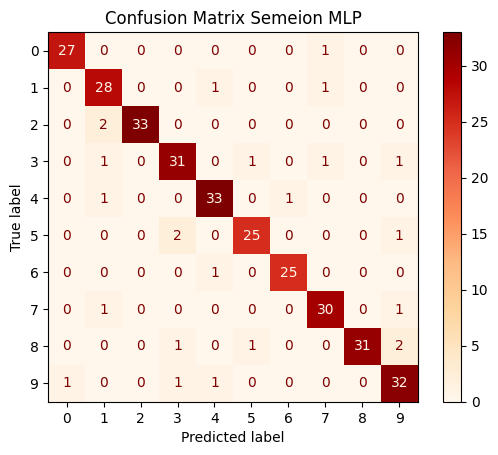

In [12]:
Sclasses = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
#create and plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(Sbest_clf,SXtest,SYtest,display_labels=Sclasses,cmap=plt.cm.OrRd,normalize=None,)
plt.title("Confusion Matrix Semeion MLP")
plt.show()
